In [78]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

#  Dimensionality Reduction, Feature Extraction, and Manifold Learning

##  Principal Component Analysis (PCA)

<IPython.core.display.Javascript object>


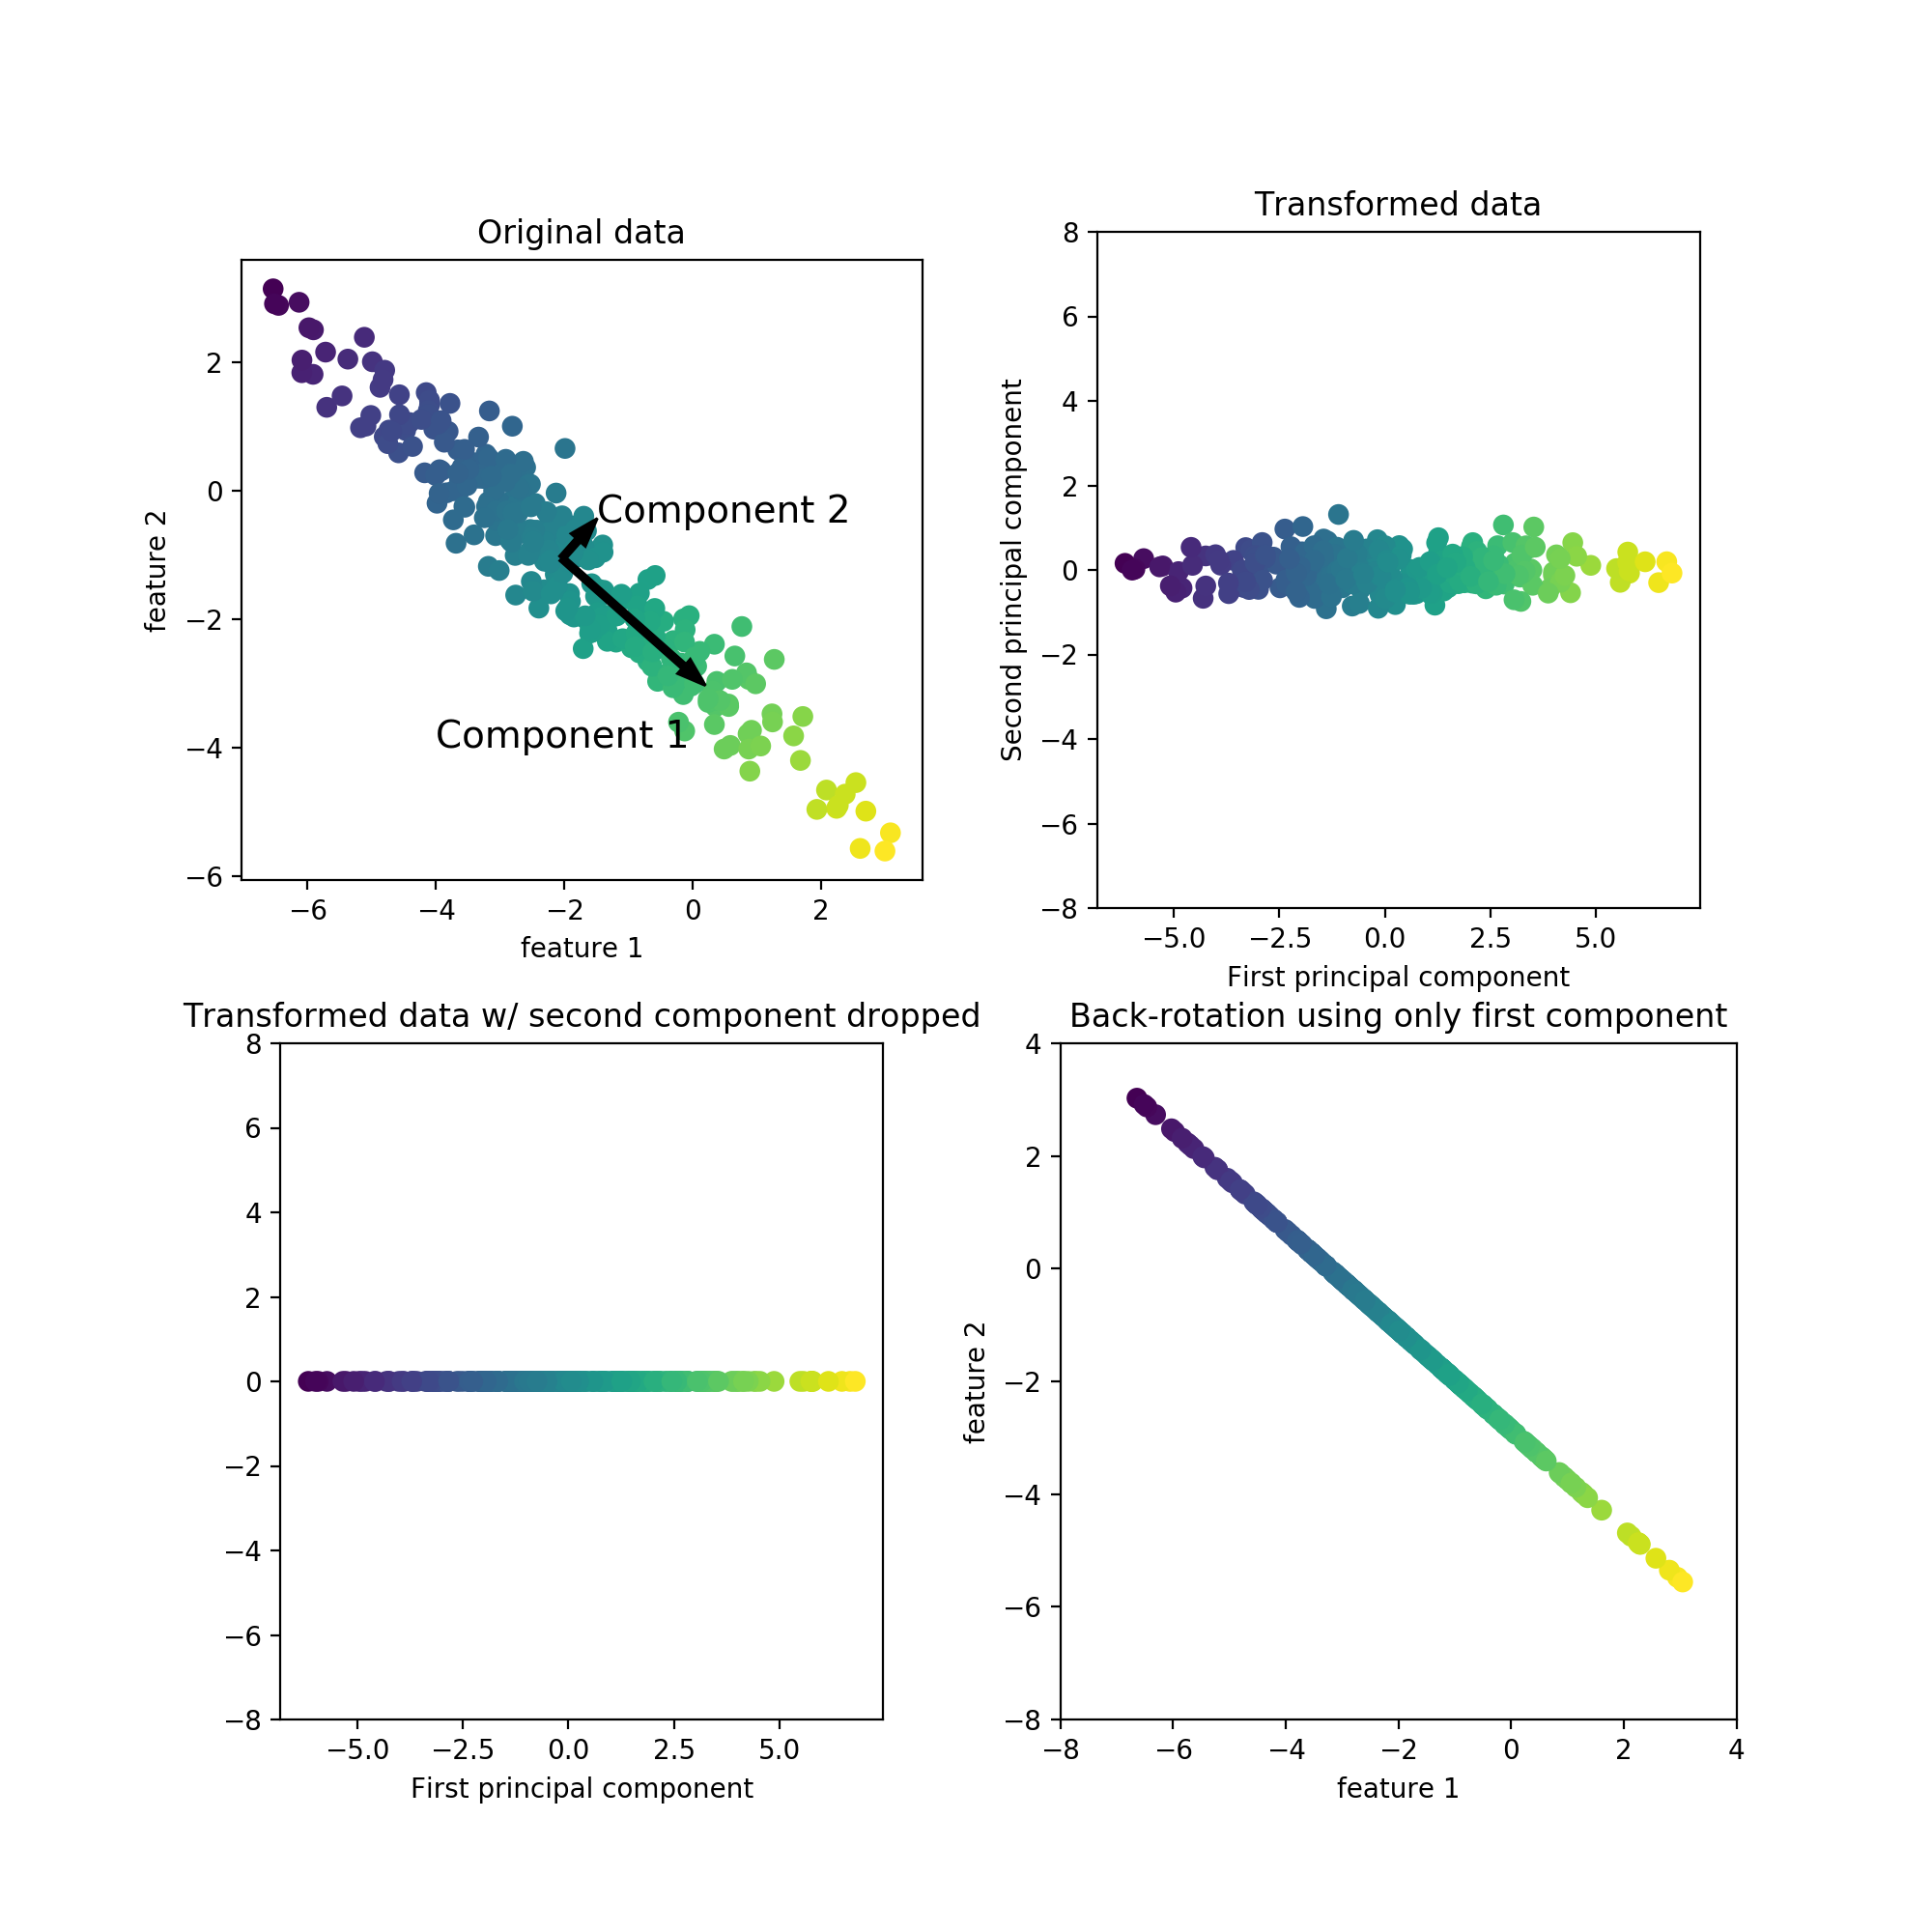

In [79]:
mglearn.plots.plot_pca_illustration()

<IPython.core.display.Javascript object>


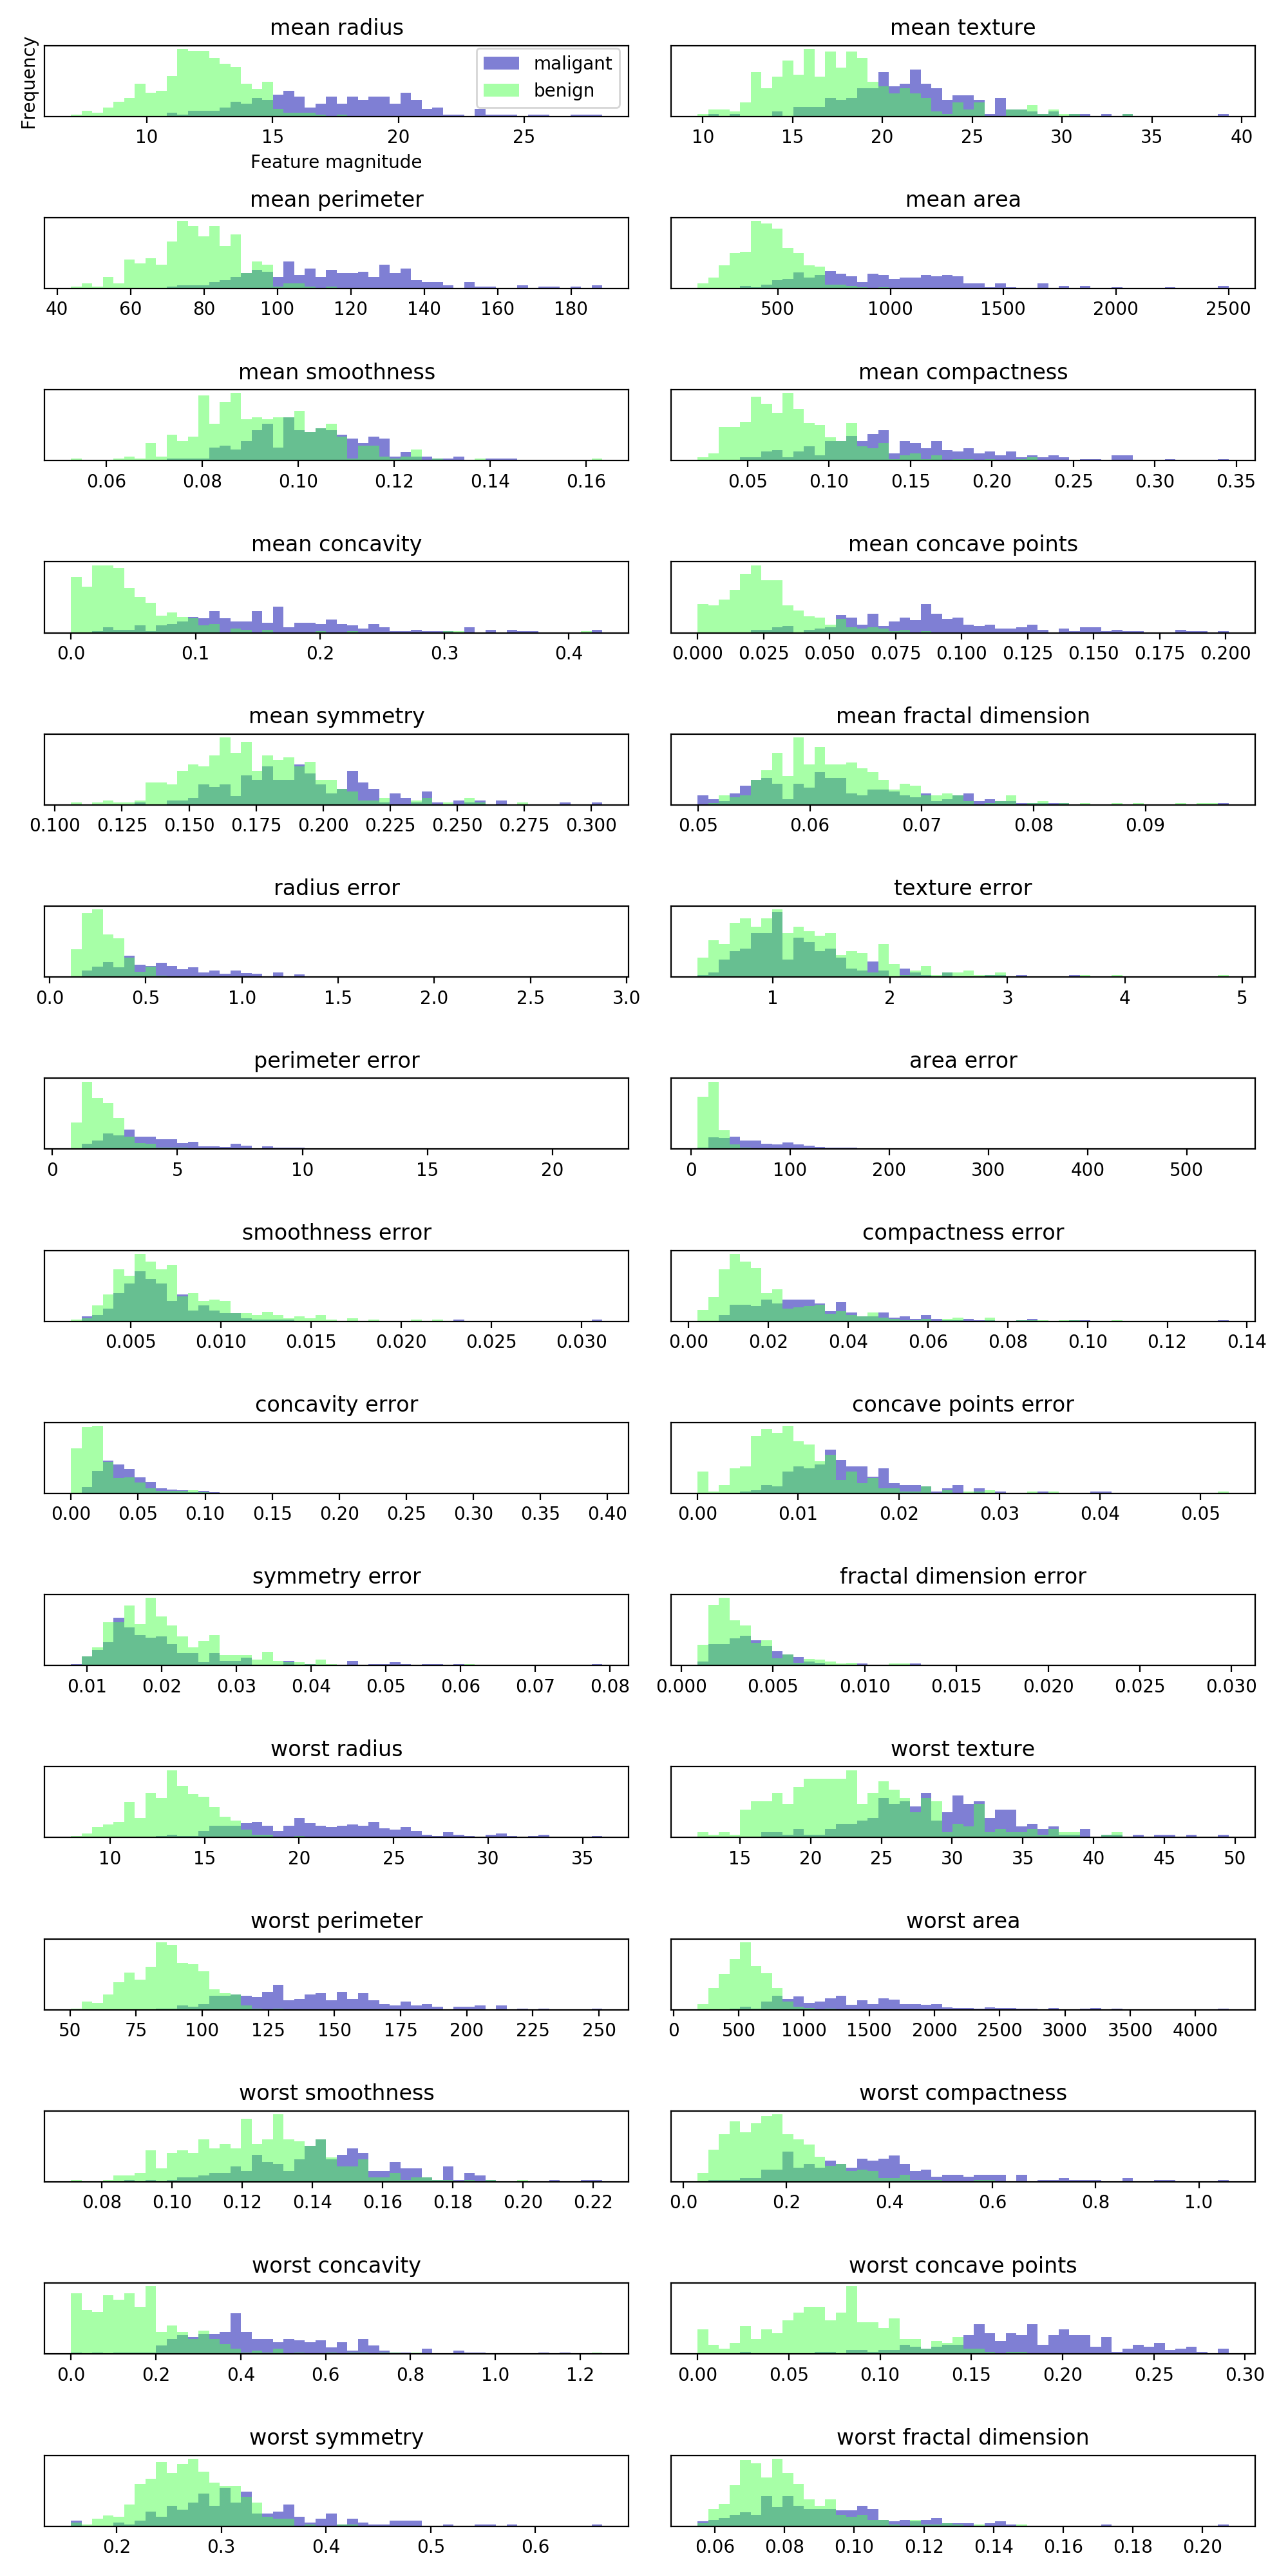

In [80]:
cancer = sklearn.datasets.load_breast_cancer()
data = cancer.data
target = cancer.target
fig, axes = plt.subplots(15, 2, figsize=(10,20))
maligant = data[target==0]
benign = data[target==1]

axes = axes.ravel()
for i in range(30):
    _, bins = np.histogram(data[:, i], bins=50)
    ax = axes[i]
    ax.hist(maligant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax.hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax.set_title(cancer.feature_names[i])
    ax.set_yticks(())
axes[0].set_xlabel("Feature magnitude")
axes[0].set_ylabel("Frequency")
axes[0].legend(["maligant", "benign"])
fig.tight_layout()

In [81]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
data_scaled.shape, data_pca.shape

((569, 30), (569, 2))

<IPython.core.display.Javascript object>


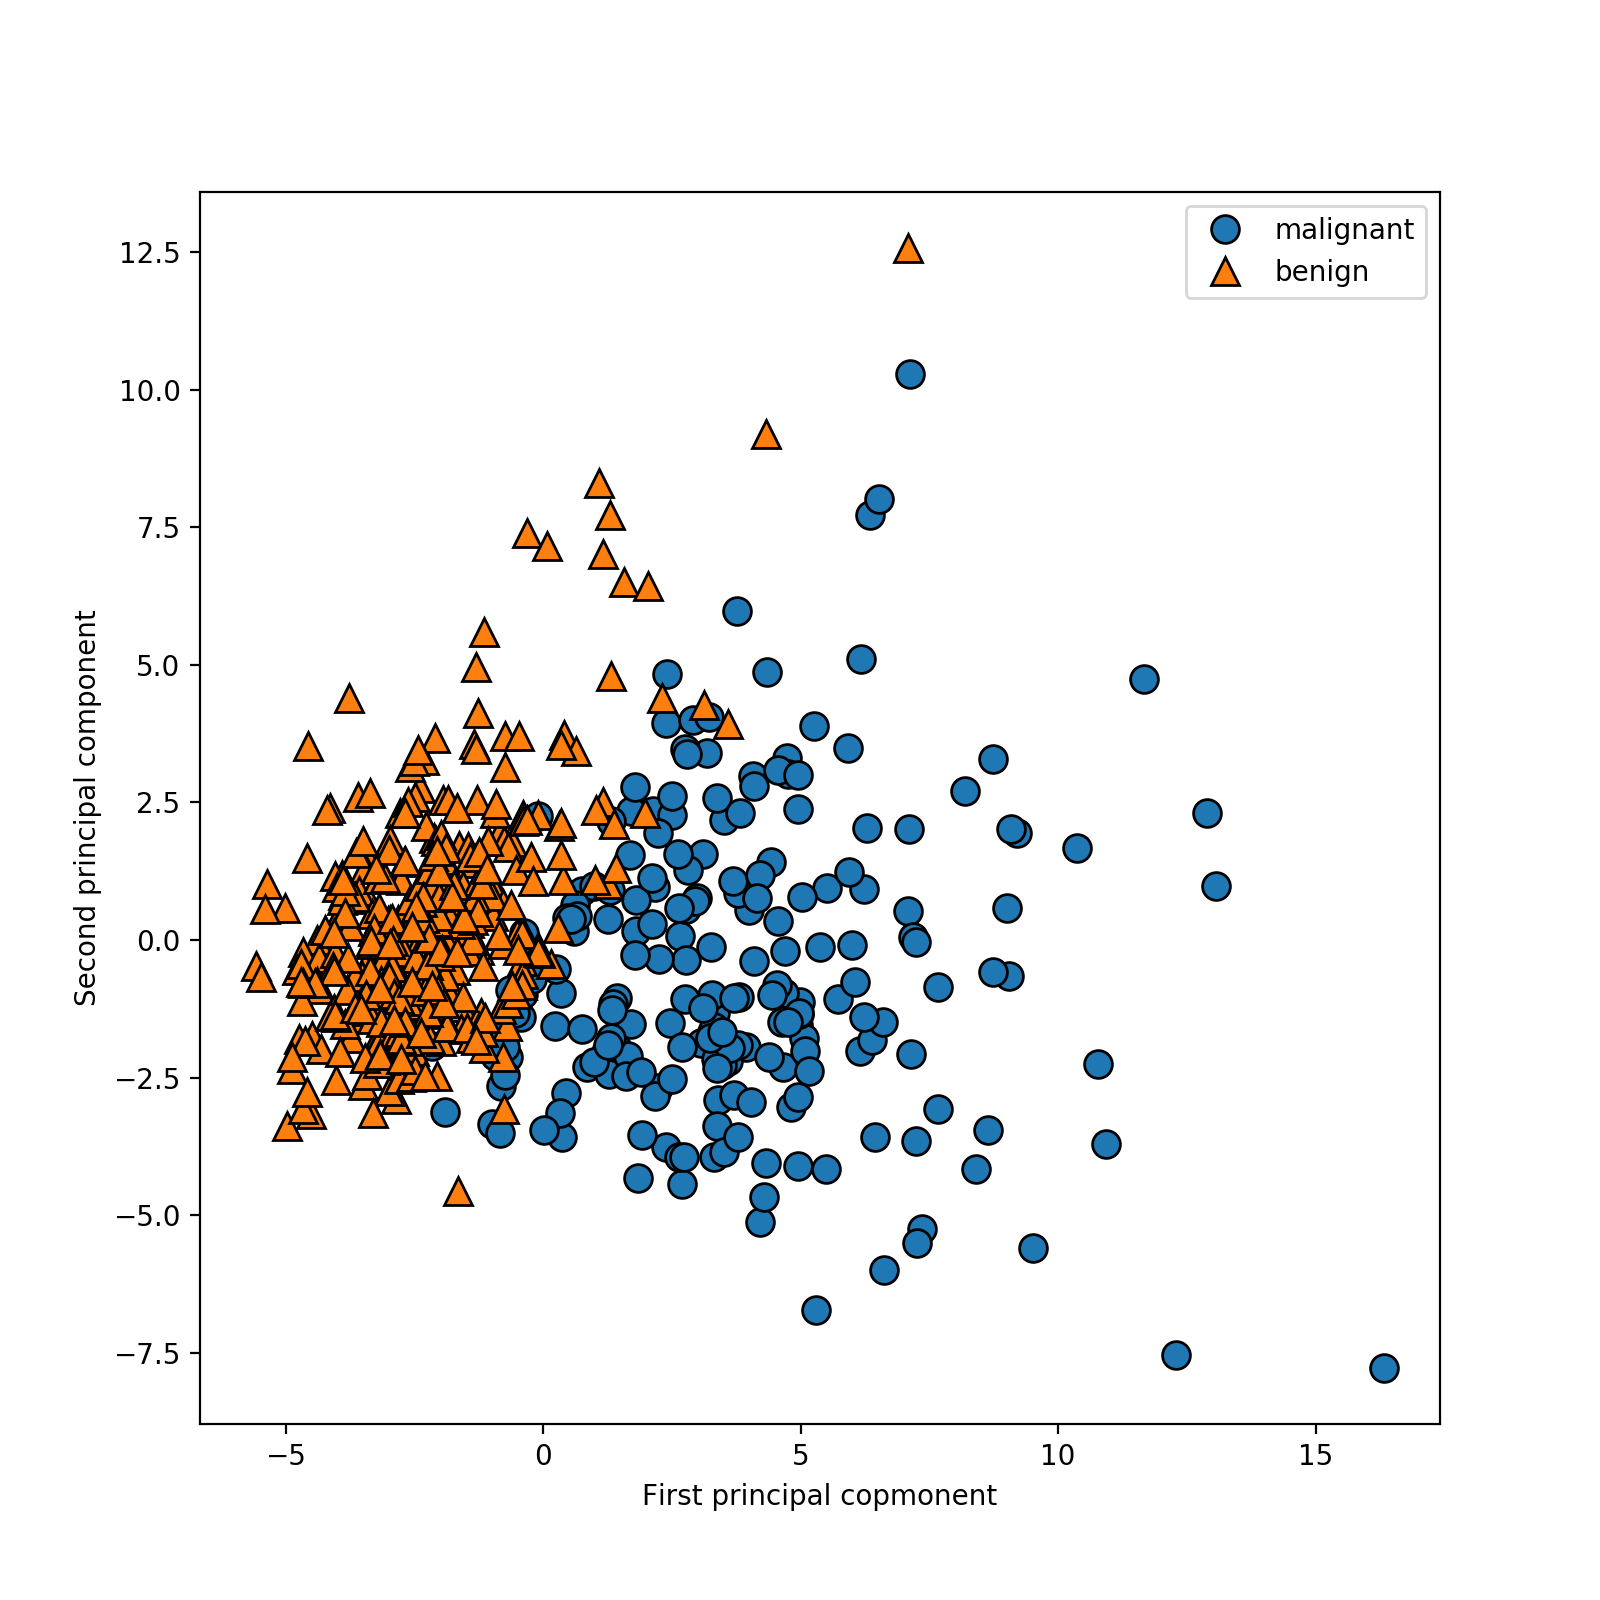

Text(0,0.5,'Second principal component')

In [82]:
fig, ax = plt.subplots(figsize=(8,8))
mglearn.discrete_scatter(data_pca[:, 0], data_pca[:, 1], target)
ax.legend(cancer.target_names)
ax.set_xlabel("First principal copmonent")
ax.set_ylabel("Second principal component")


In [83]:
pca.components_.shape

(2, 30)

In [84]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<IPython.core.display.Javascript object>


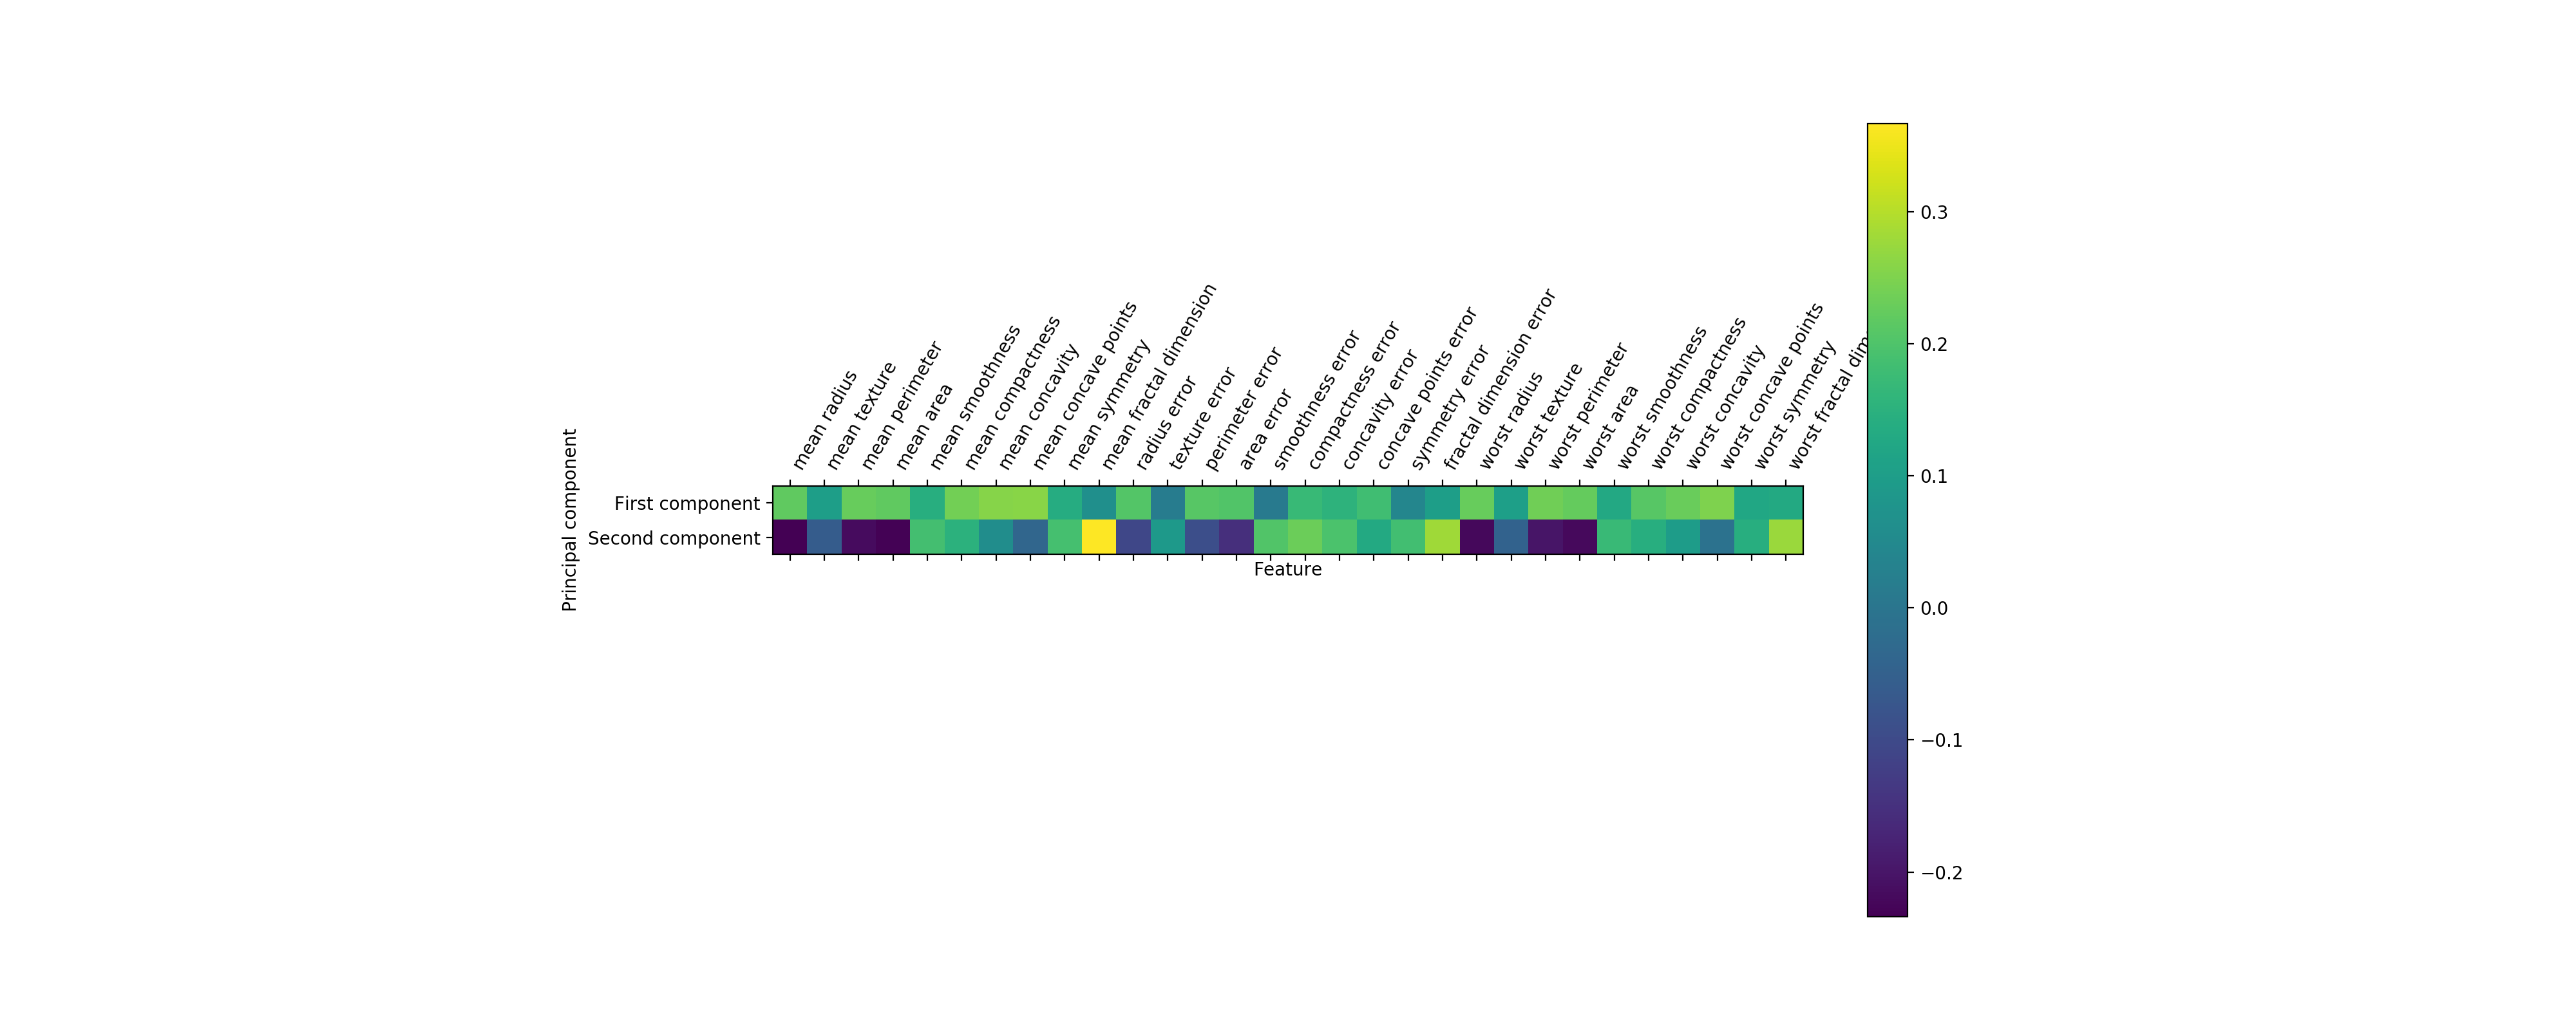

In [85]:
fig, ax = plt.subplots(figsize=(20, 8))
im = ax.matshow(pca.components_, cmap="viridis")
ax.set_yticks([0,1])
ax.set_yticklabels(["First component", "Second component"])
fig.colorbar(im, ax=ax)
ax.set_xlabel("Feature")
ax.set_ylabel("Principal component")
ax.set_xticks(range(30))
ax.set_xticklabels(cancer.feature_names, rotation=60, ha="left")
fig.subplots_adjust(left=0.3, right=0.8)

In [86]:
people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
image_shape

(87, 65)

<IPython.core.display.Javascript object>


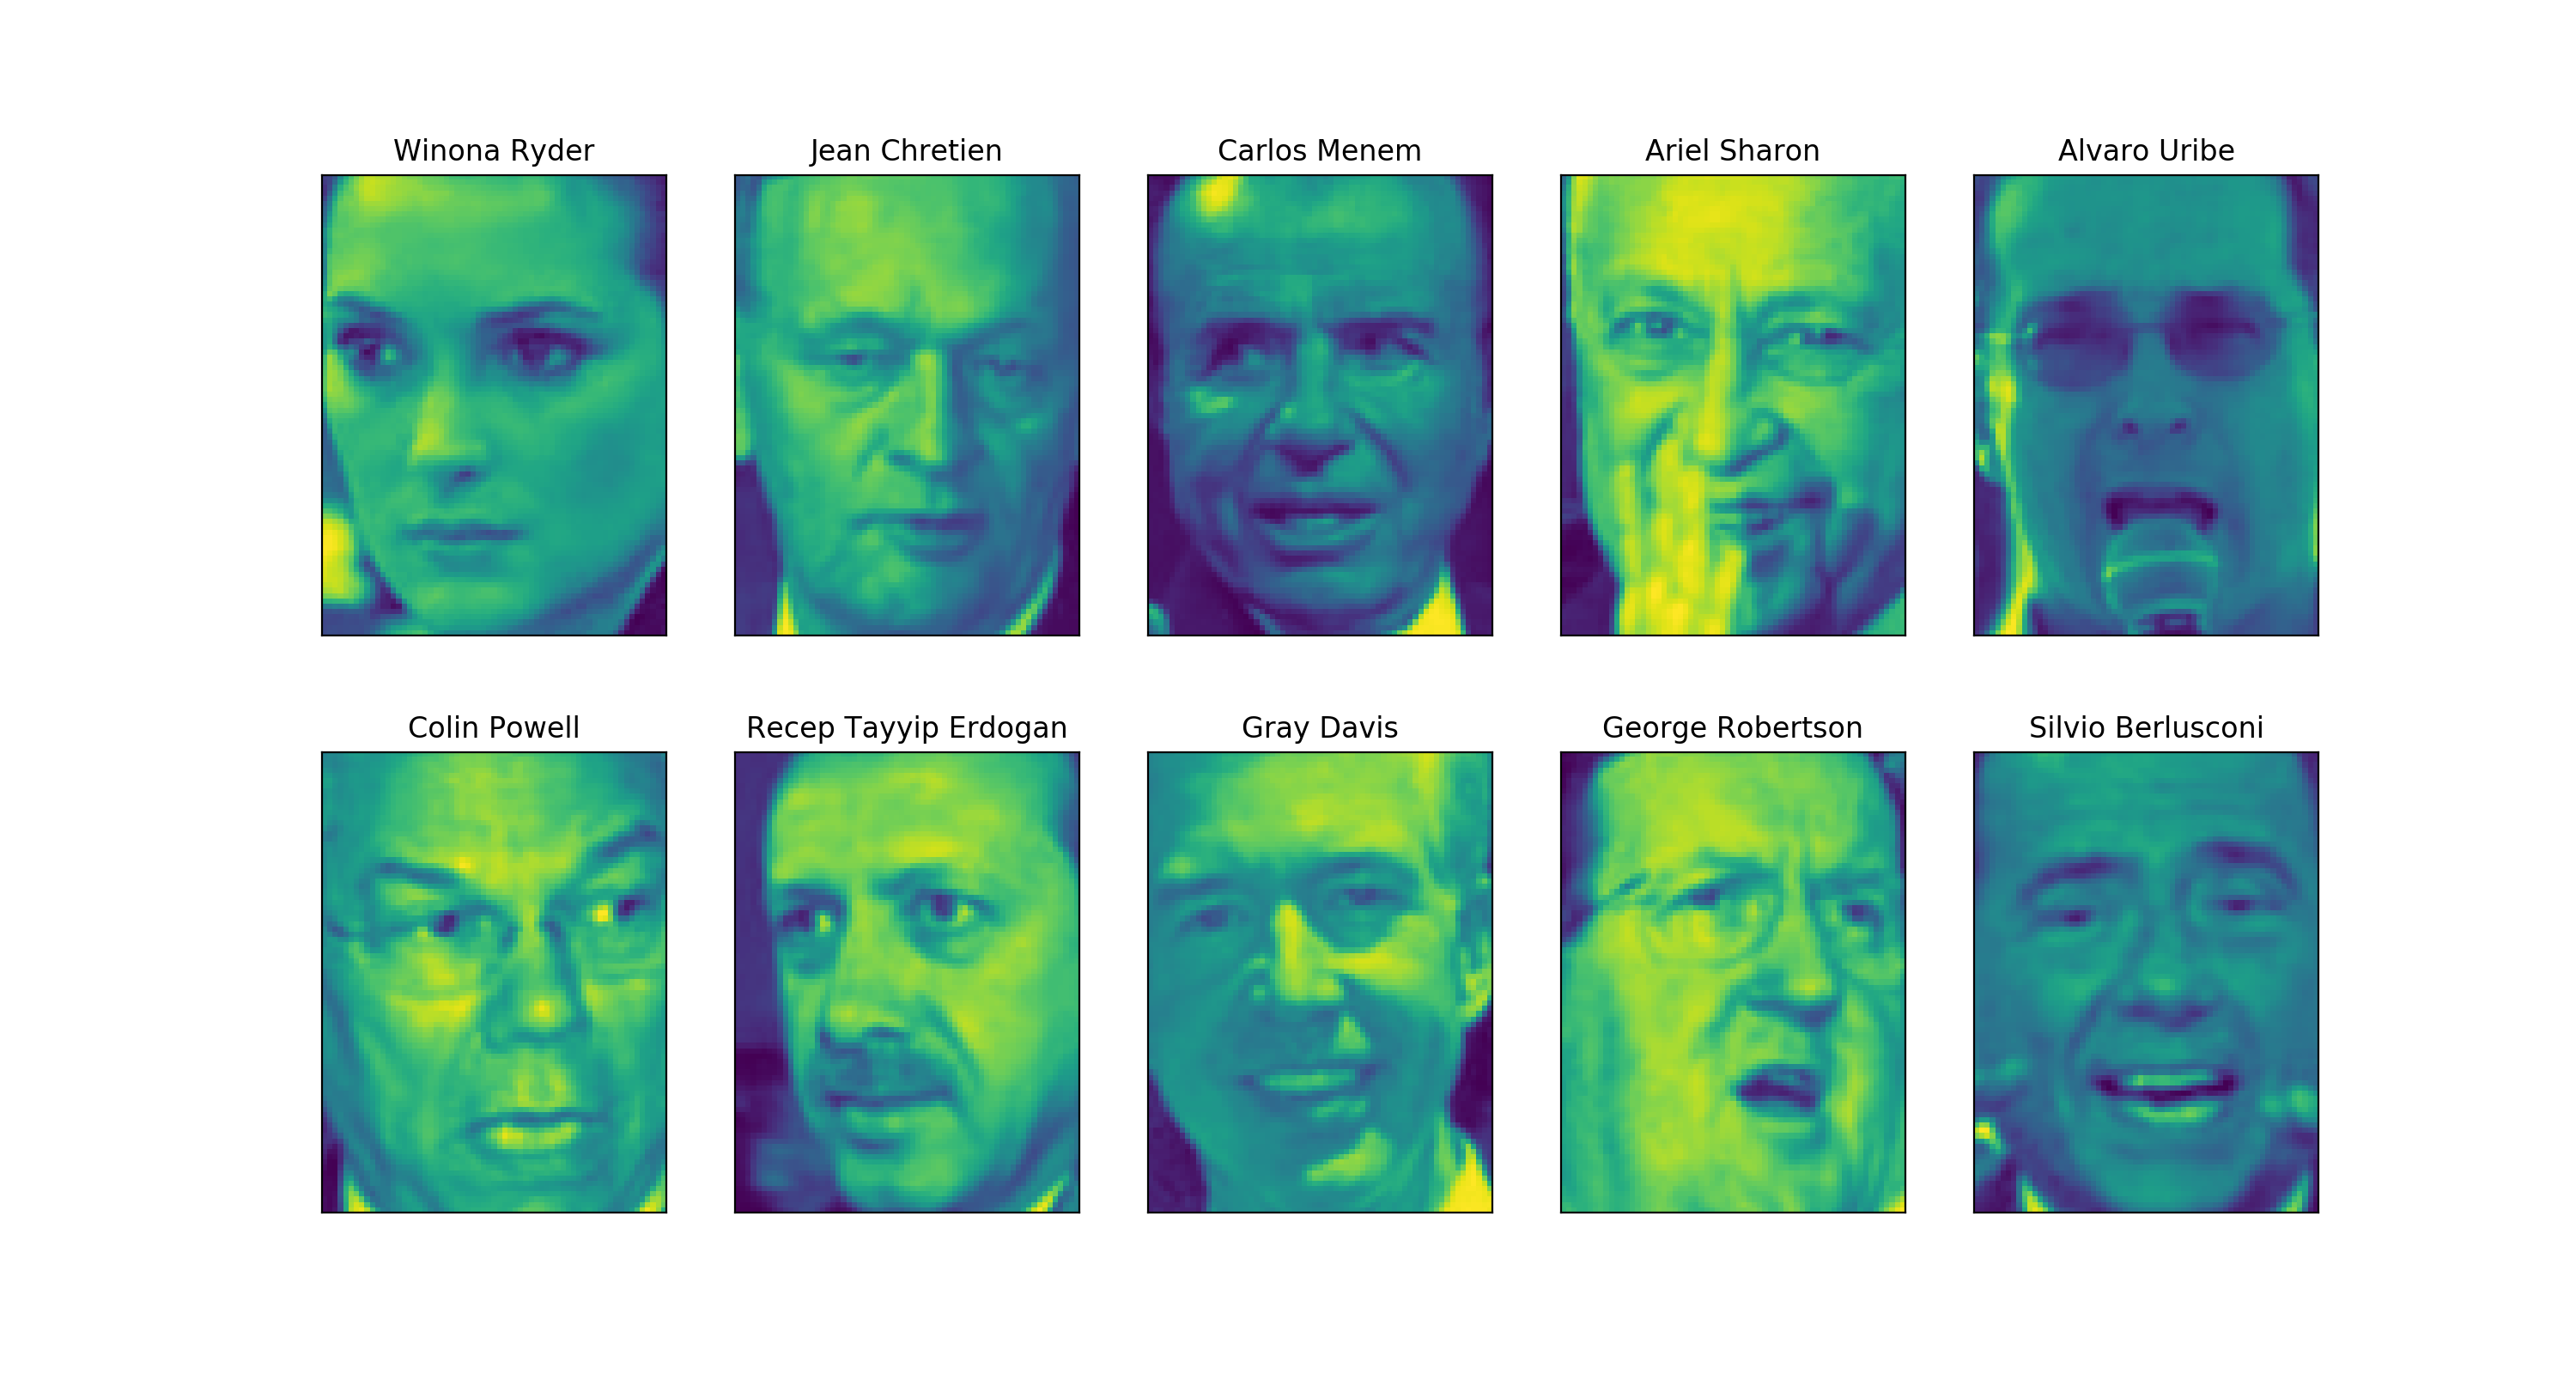

In [87]:
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [88]:
people.images.shape, len(people.target_names)


((3023, 87, 65), 62)

In [89]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i+1) % 3 == 0:
        print()
counts

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24])

In [90]:
people.target.shape

(3023,)

In [91]:
masks = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    masks[np.where(people.target==target)[0][:50]] = True
masks
X_people = people.data[masks]
y_people = people.target[masks]
X_people = X_people/255

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people)
X_train.shape, y_train.shape

((1547, 5655), (1547,))

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
X_train.shape, y_train.shape

((1547, 5655), (1547,))

In [94]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.23255813953488372

In [95]:
pca = sklearn.decomposition.PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((1547, 100), (516, 100))

In [96]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.31201550387596899

<IPython.core.display.Javascript object>


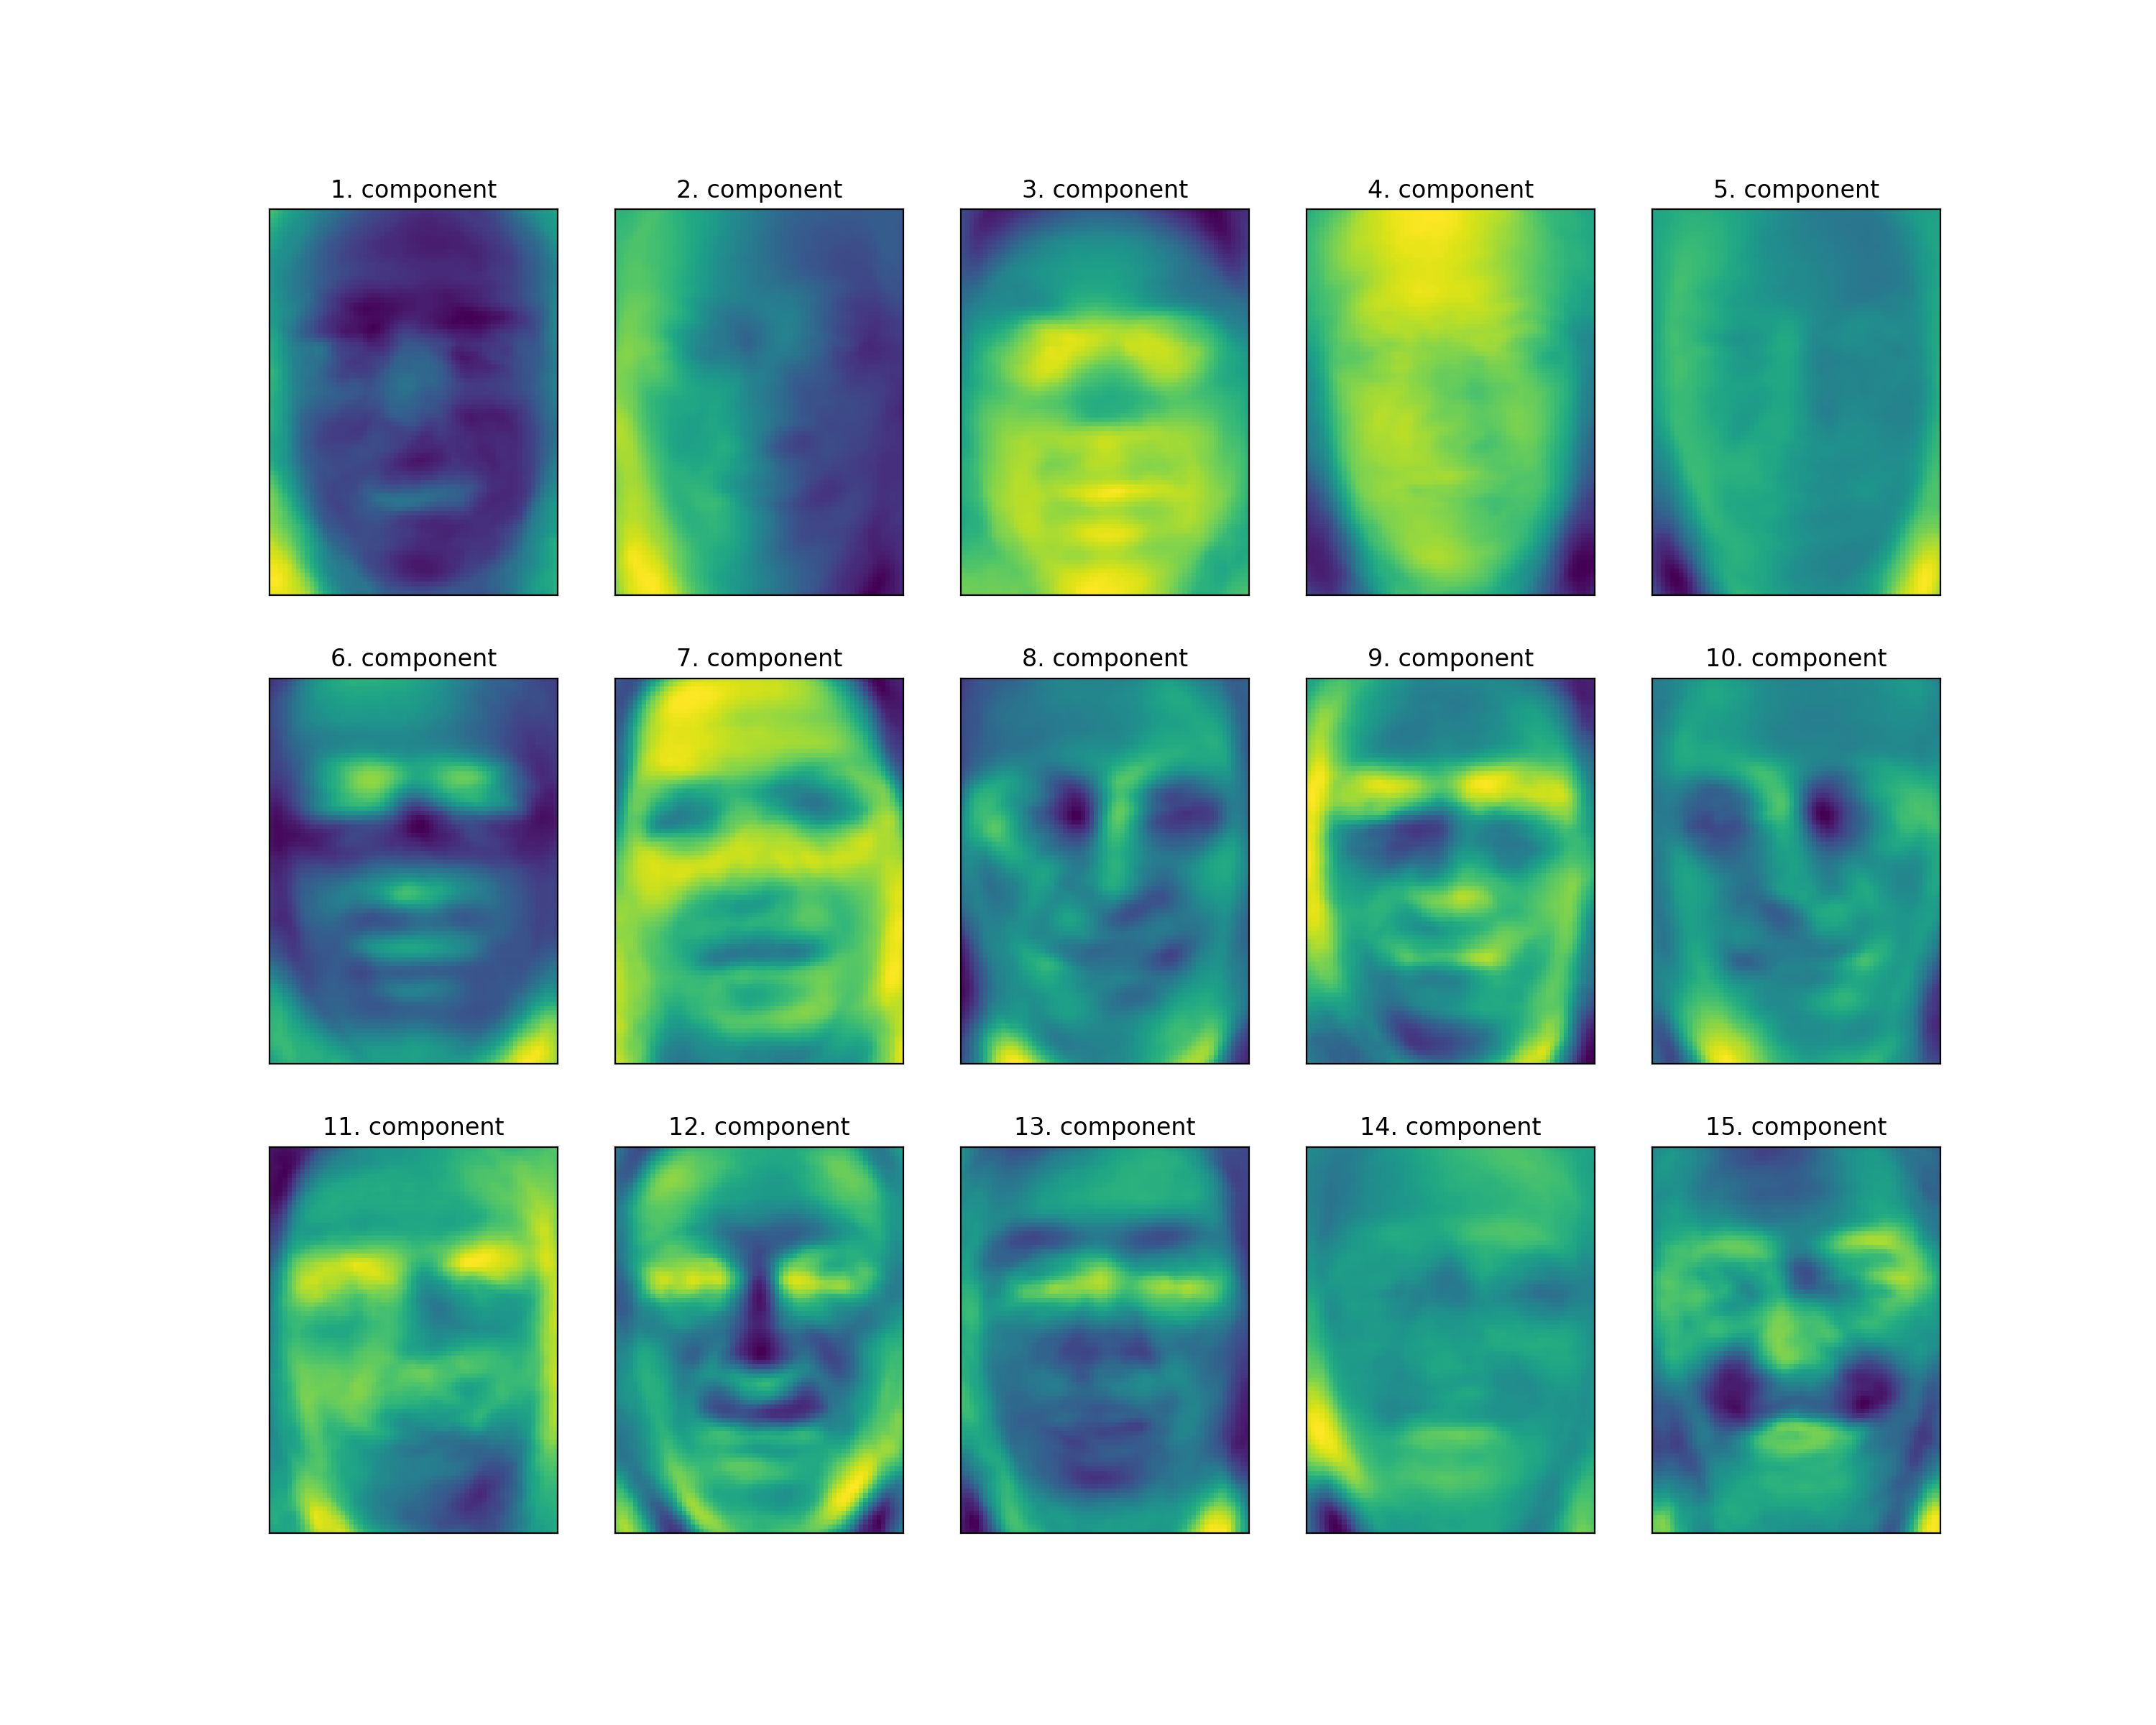

In [97]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format(i+1))

<IPython.core.display.Javascript object>


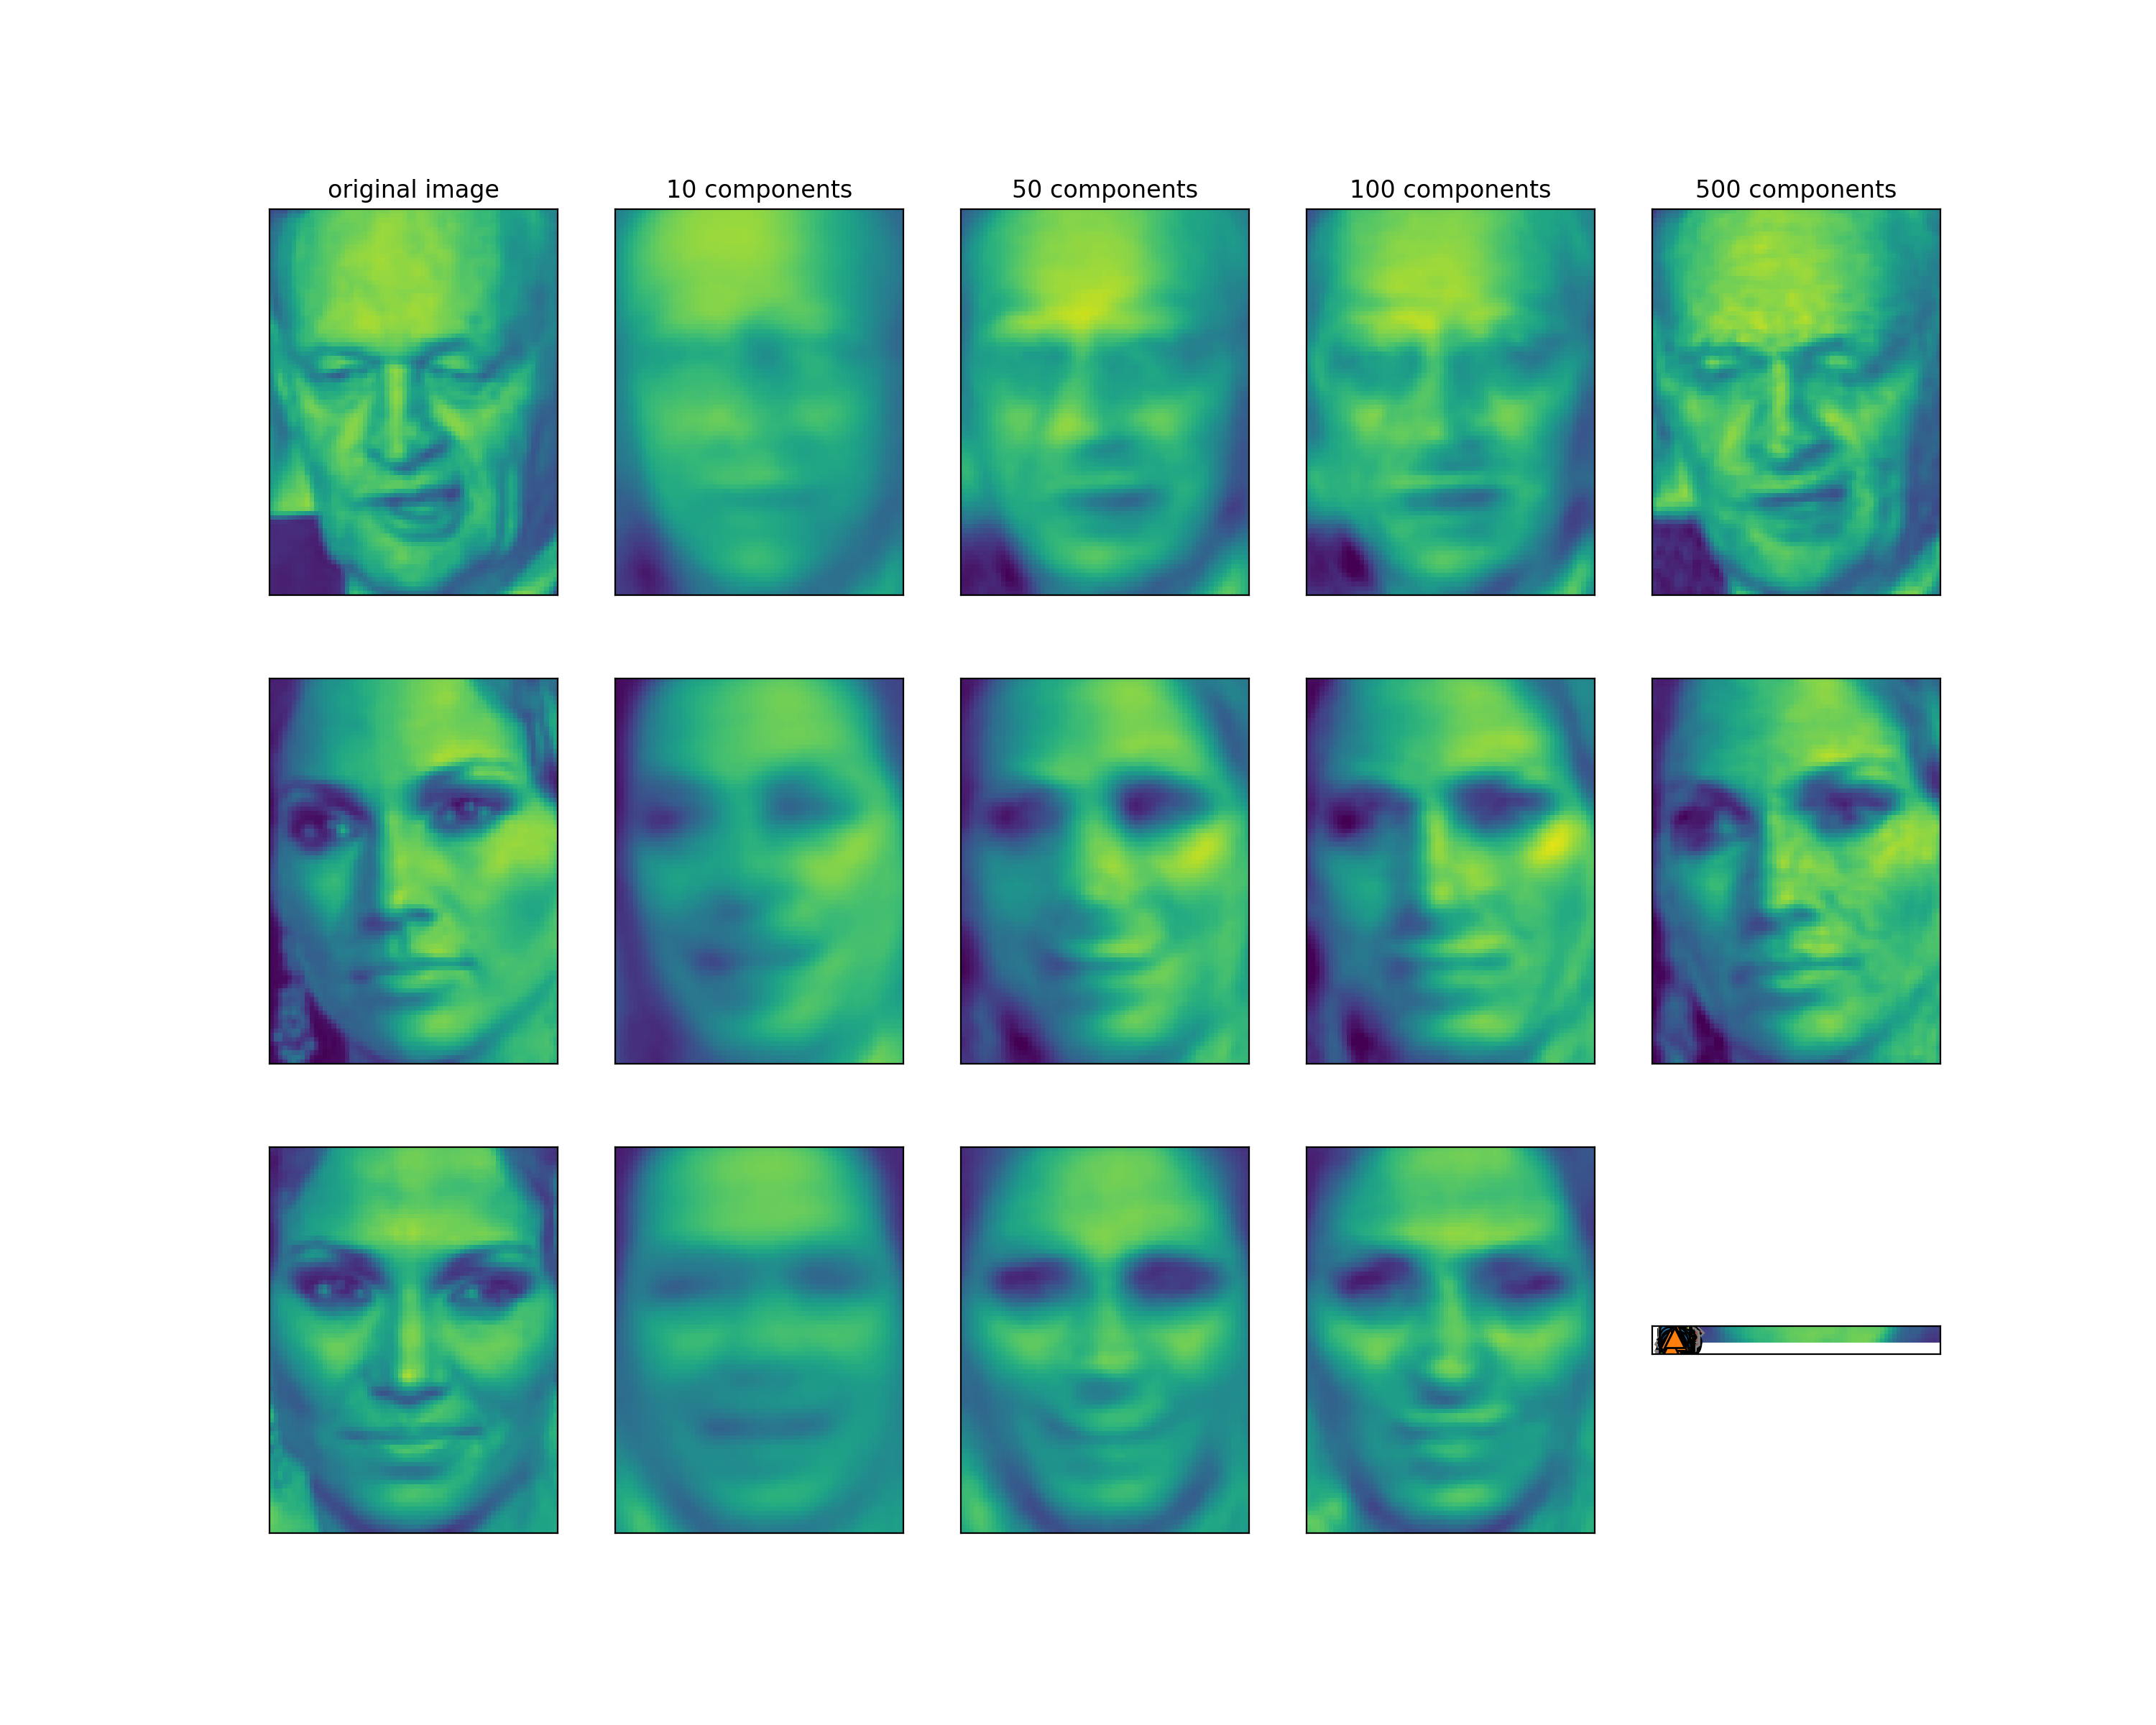

In [98]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

<IPython.core.display.Javascript object>


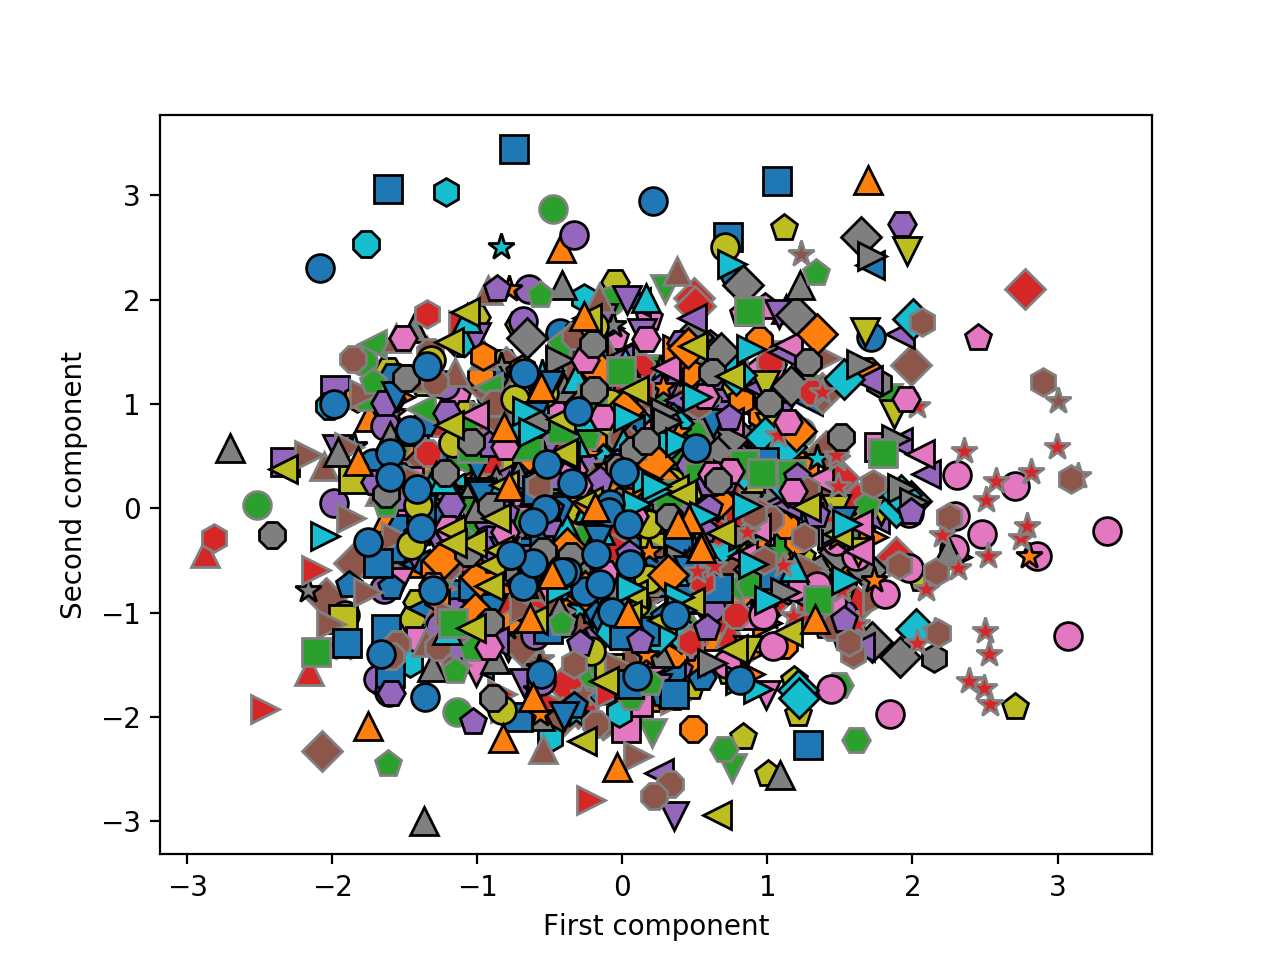

Text(0,0.5,'Second component')

In [100]:
fig, ax = plt.subplots()
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
ax.set_xlabel("First component")
ax.set_ylabel("Second component")

## Non negative matrix factorization

<IPython.core.display.Javascript object>


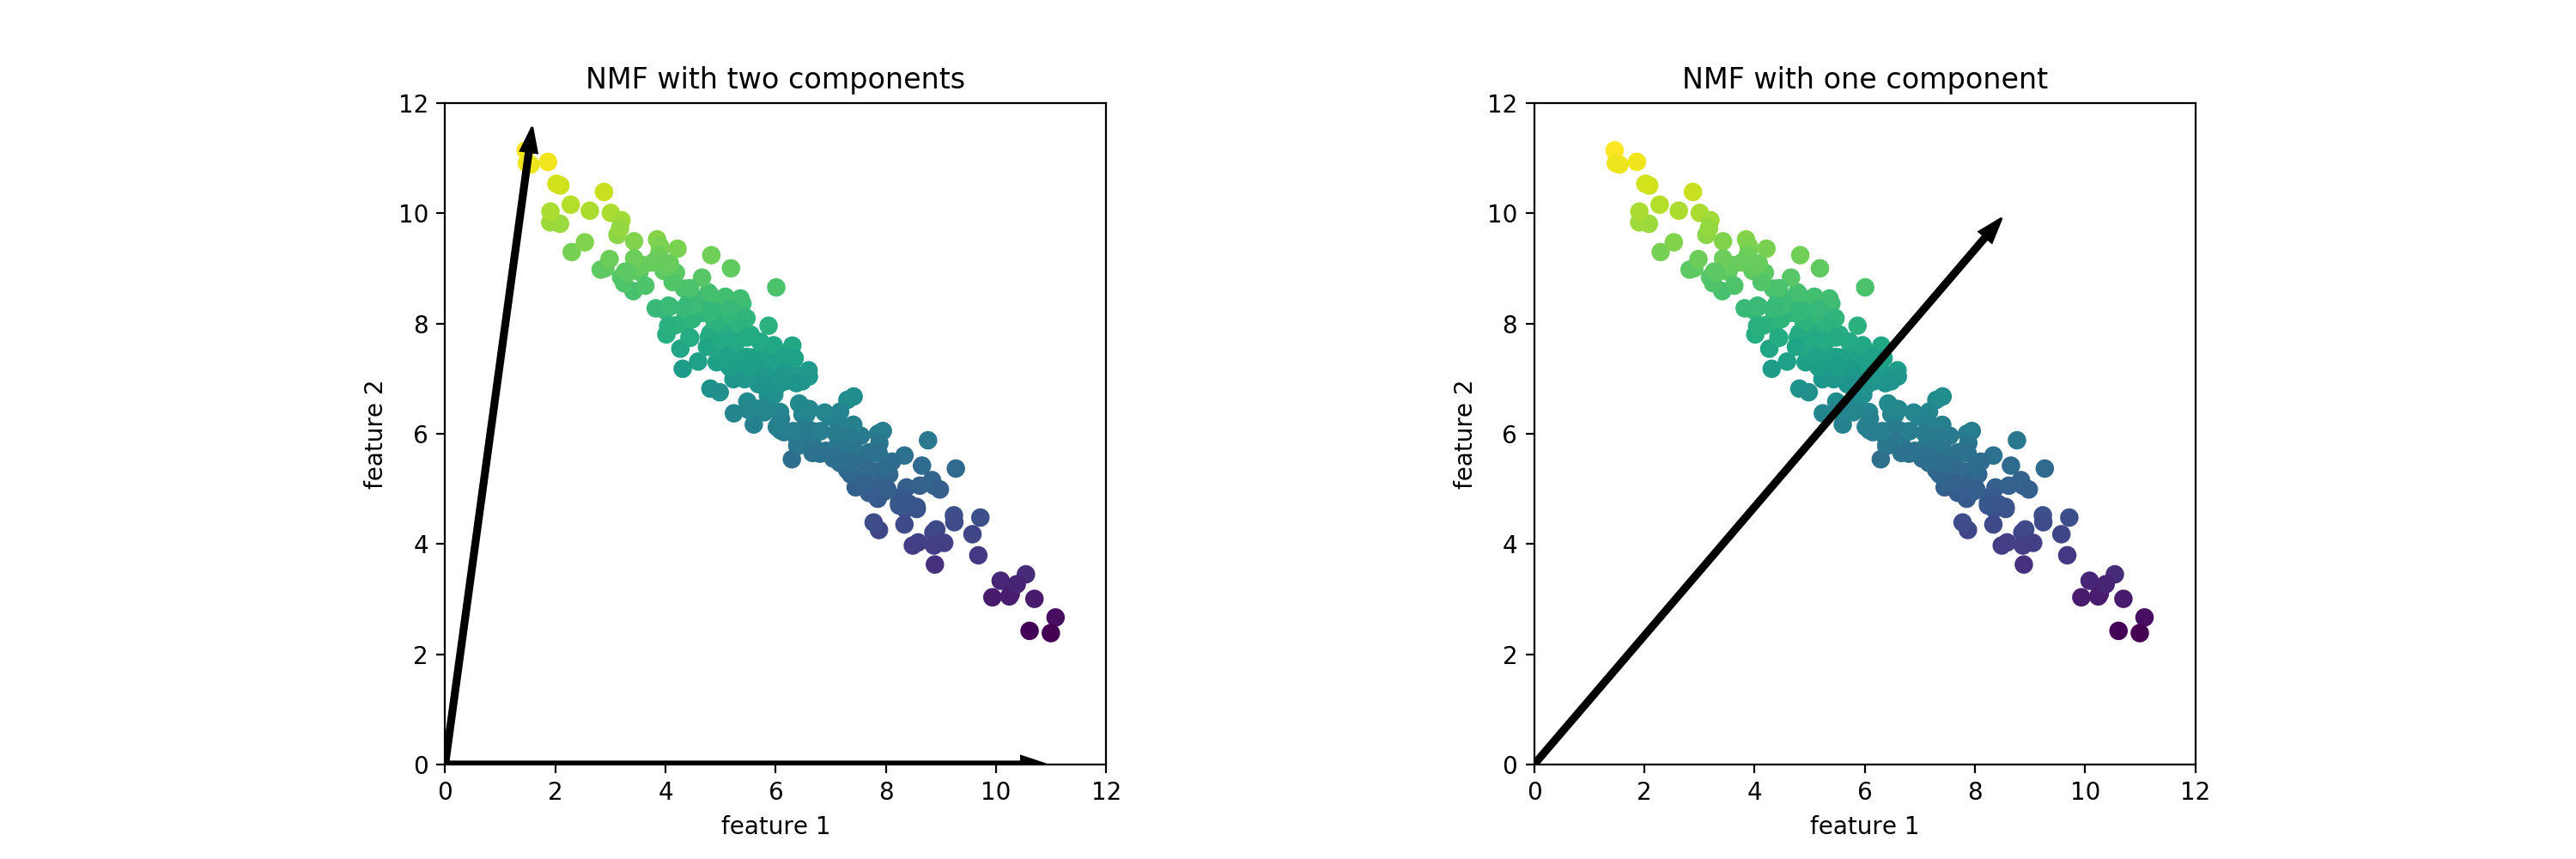

In [101]:
mglearn.plots.plot_nmf_illustration()

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[ 0.535948, ...,  0.243137],
       ..., 
       [ 0.043137, ...,  0.596078]], dtype=float32), 
array([[ 0.237908, ...,  0.269281],
       ..., 
       [ 0.4     , ...,  0.254902]], dtype=float32))
______________________________________________________nmf_faces - 414.5s, 6.9min


<IPython.core.display.Javascript object>


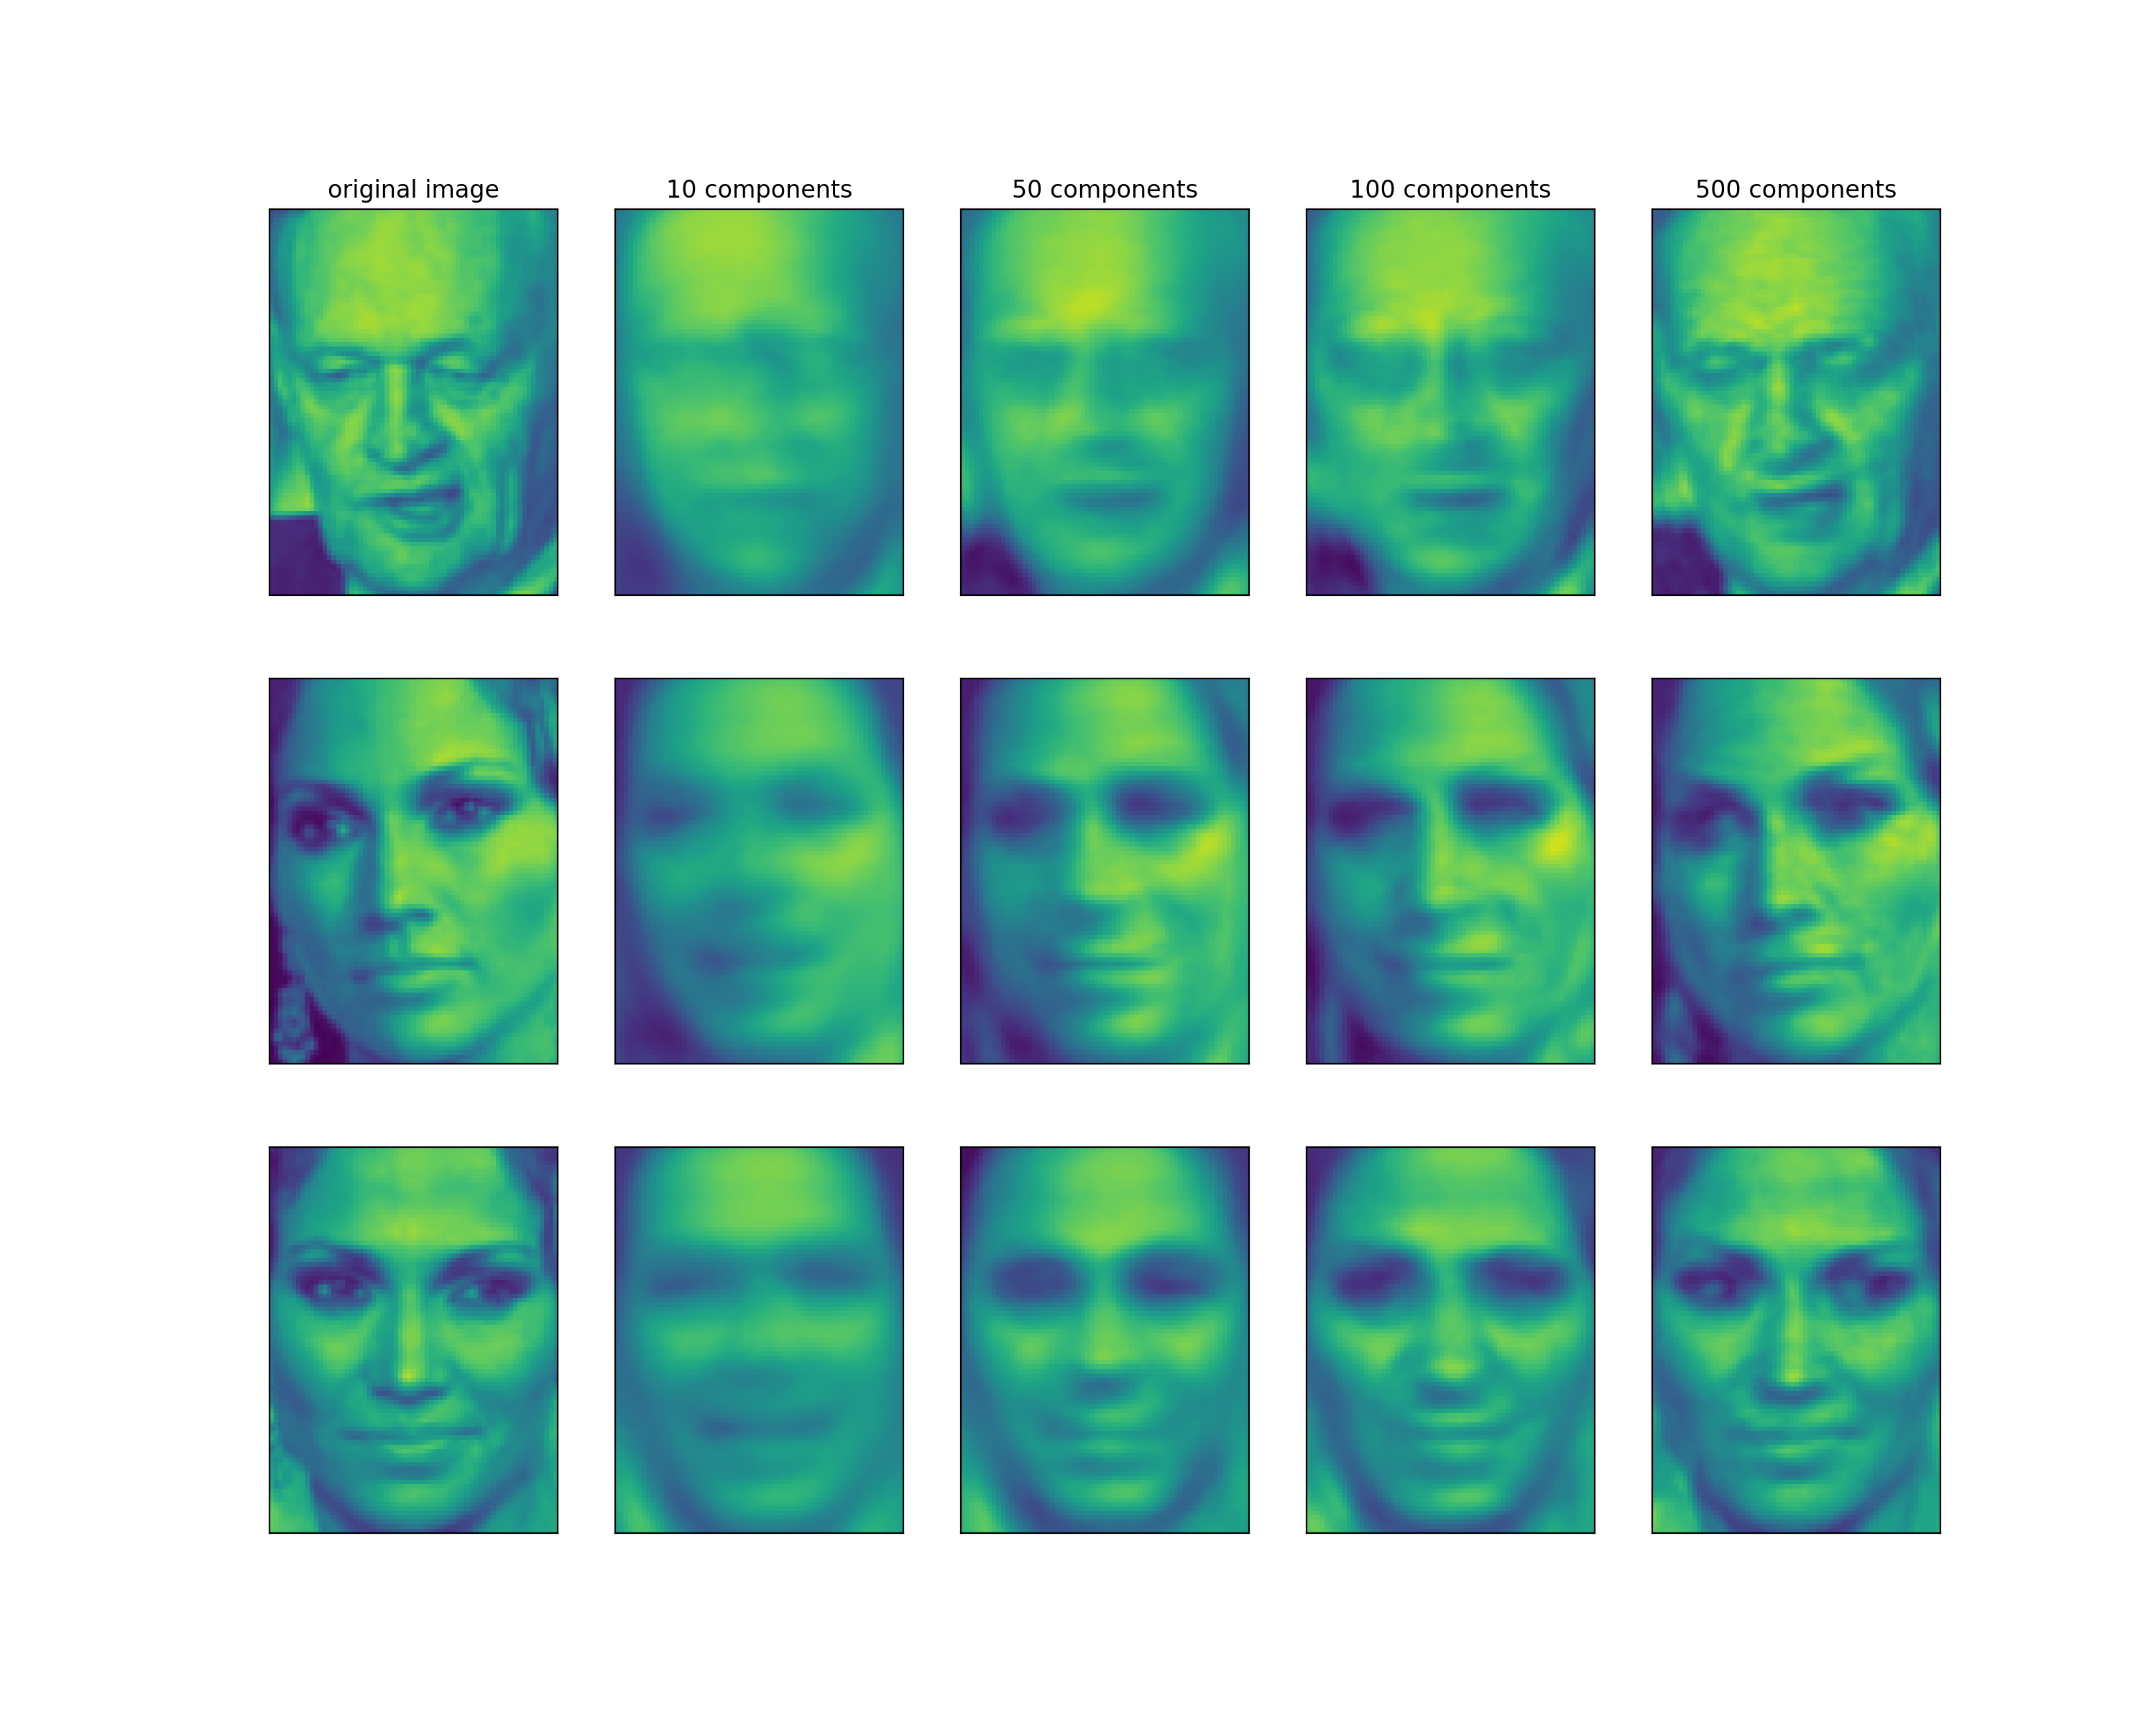

In [104]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

In [105]:
nmf = sklearn.decomposition.NMF(n_components=15, random_state=0)
nmf.fit(X_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=15, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

<IPython.core.display.Javascript object>


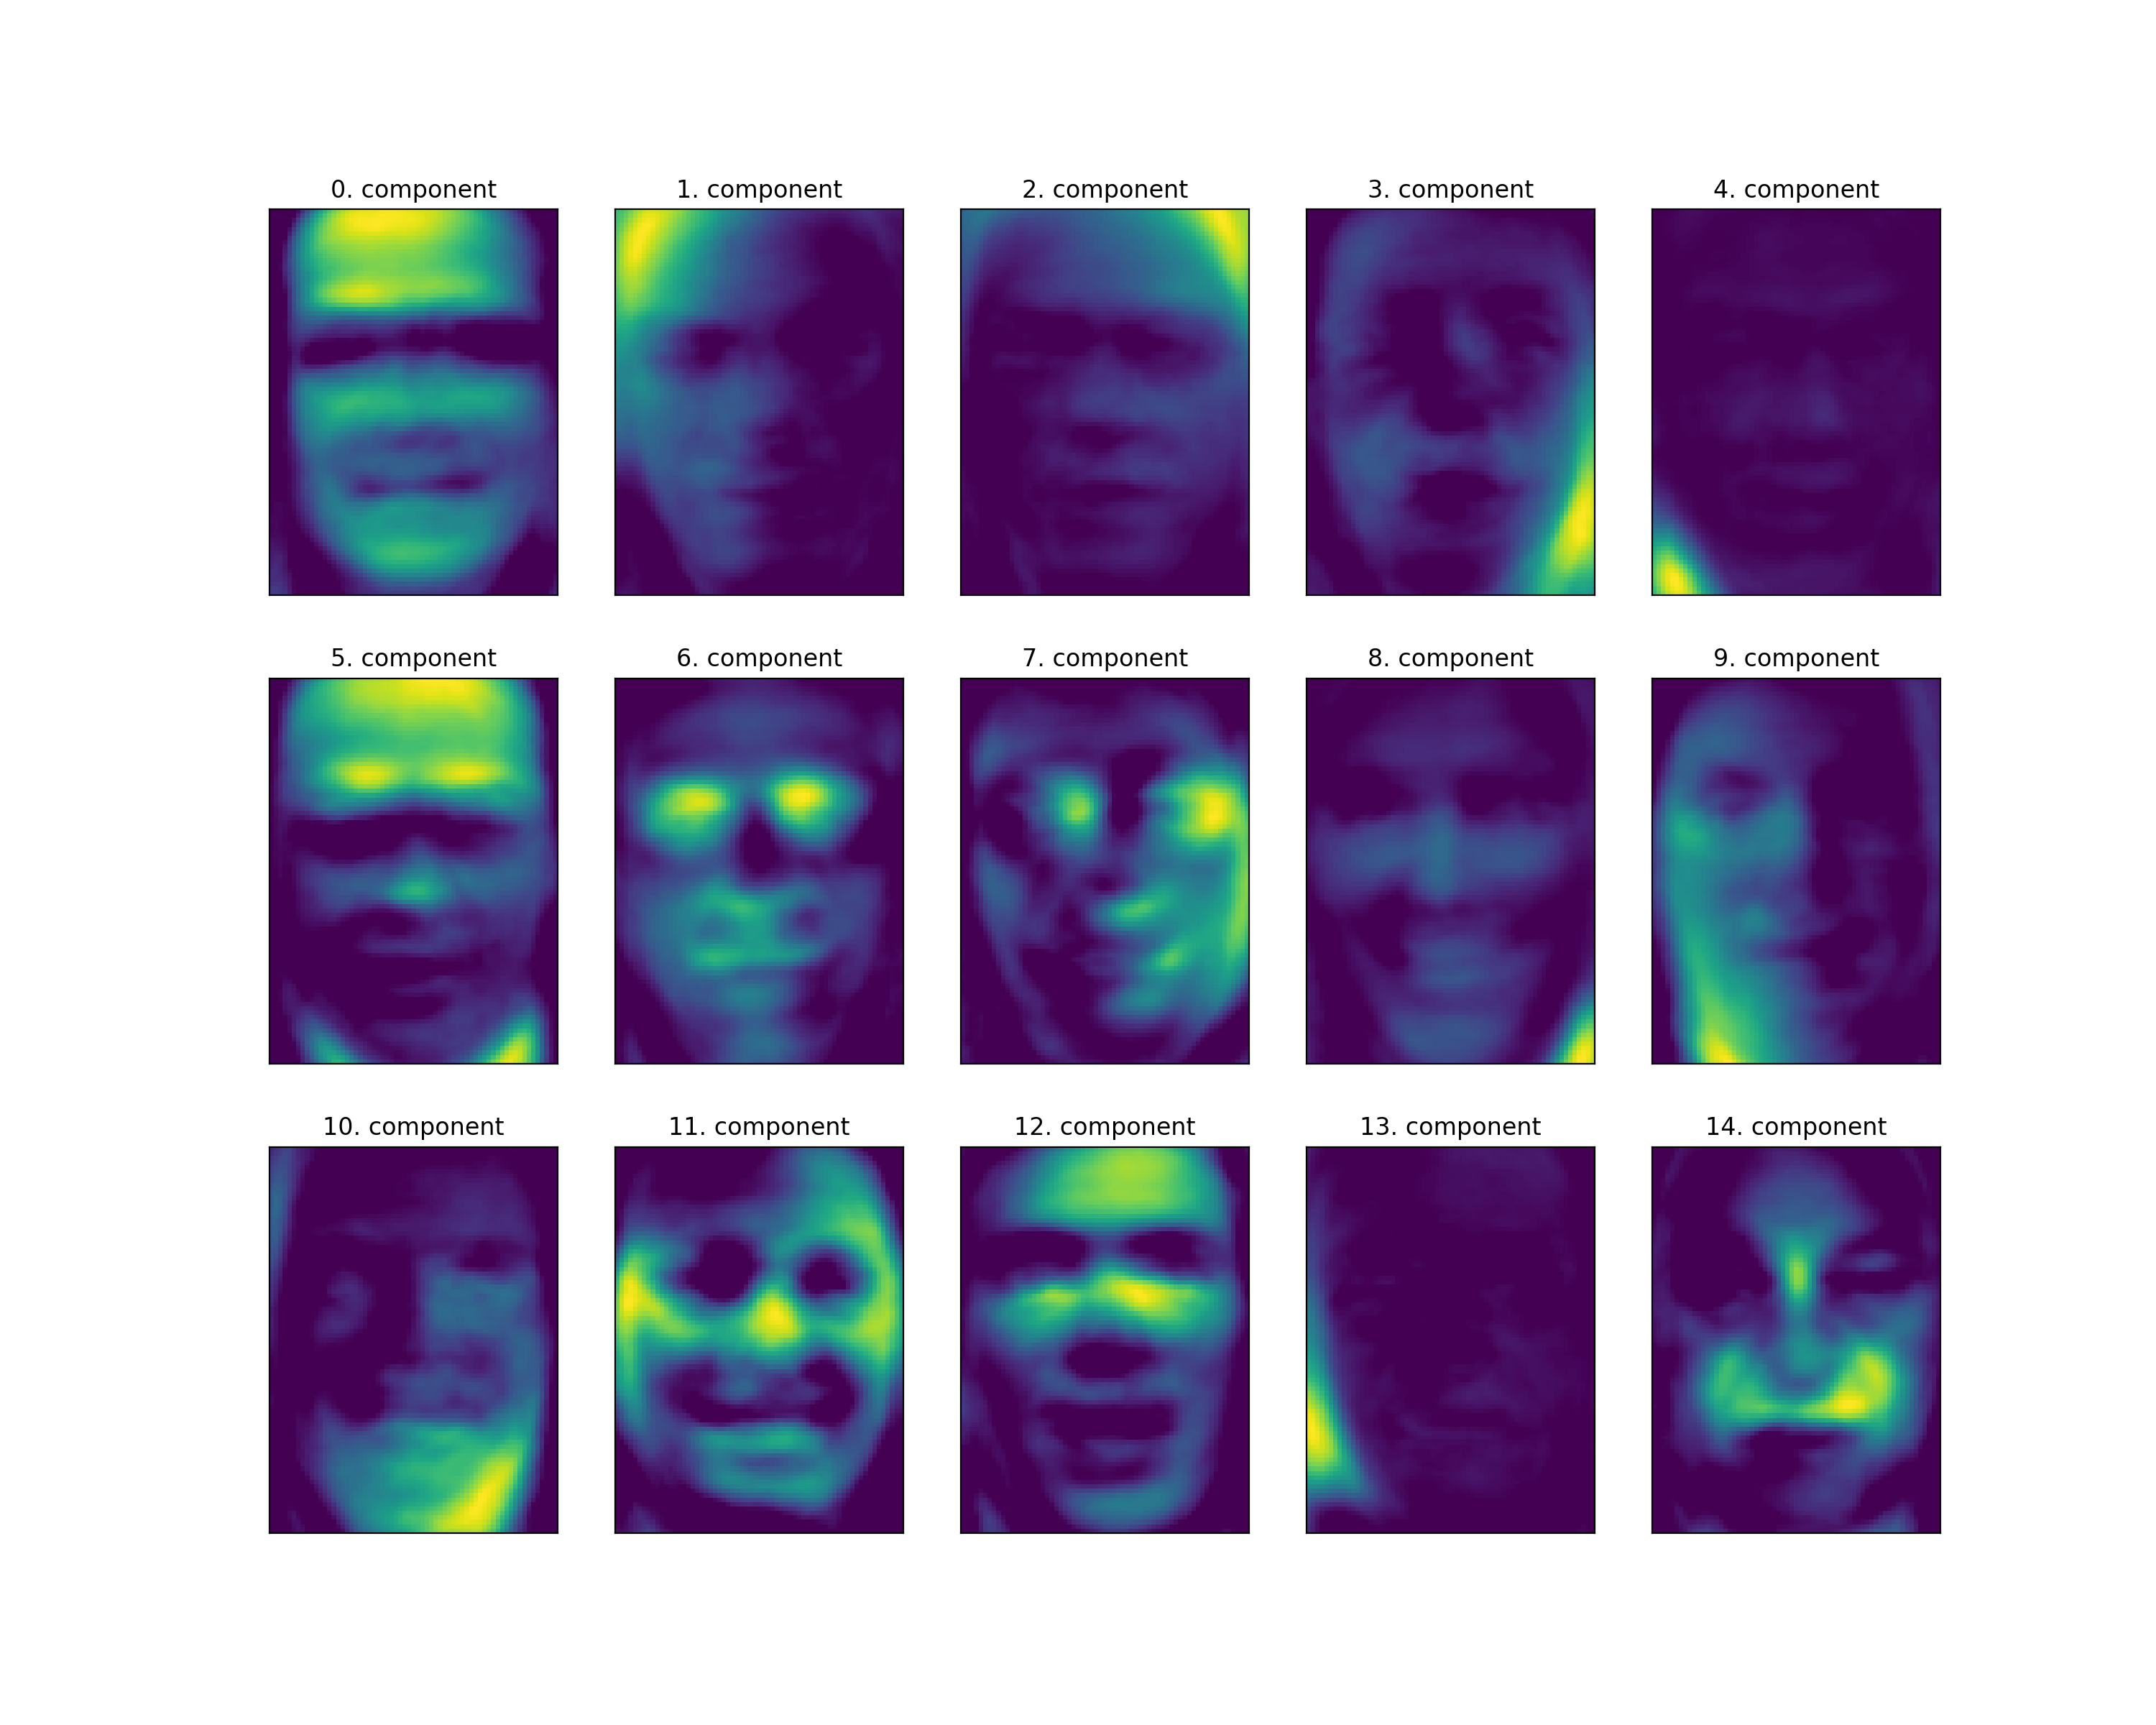

In [106]:
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15,12), subplot_kw={"xticks":(), "yticks": ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

In [107]:
X_train.shape

(1547, 5655)

In [108]:
X_people.shape

(2063, 5655)

<IPython.core.display.Javascript object>


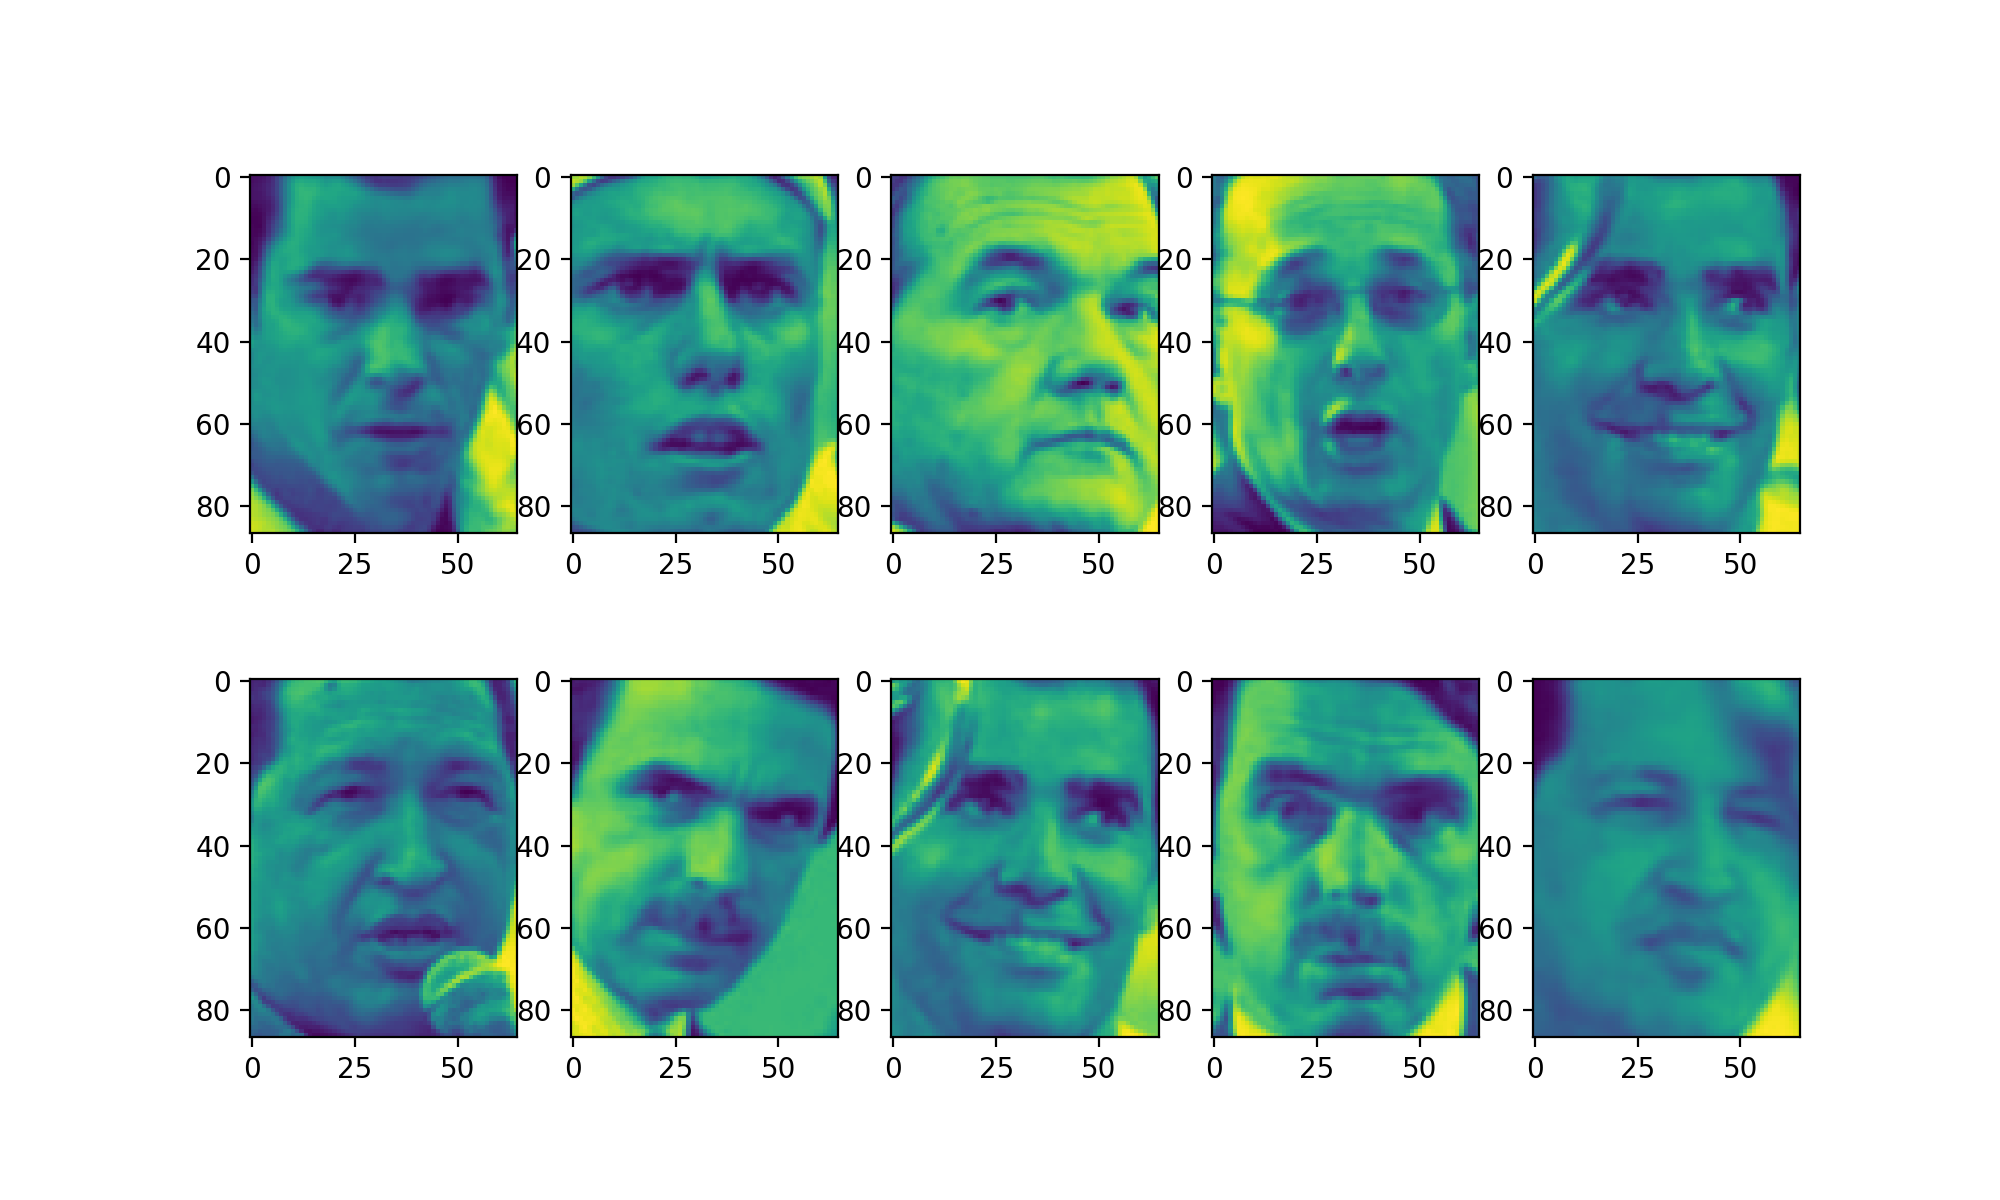

<IPython.core.display.Javascript object>


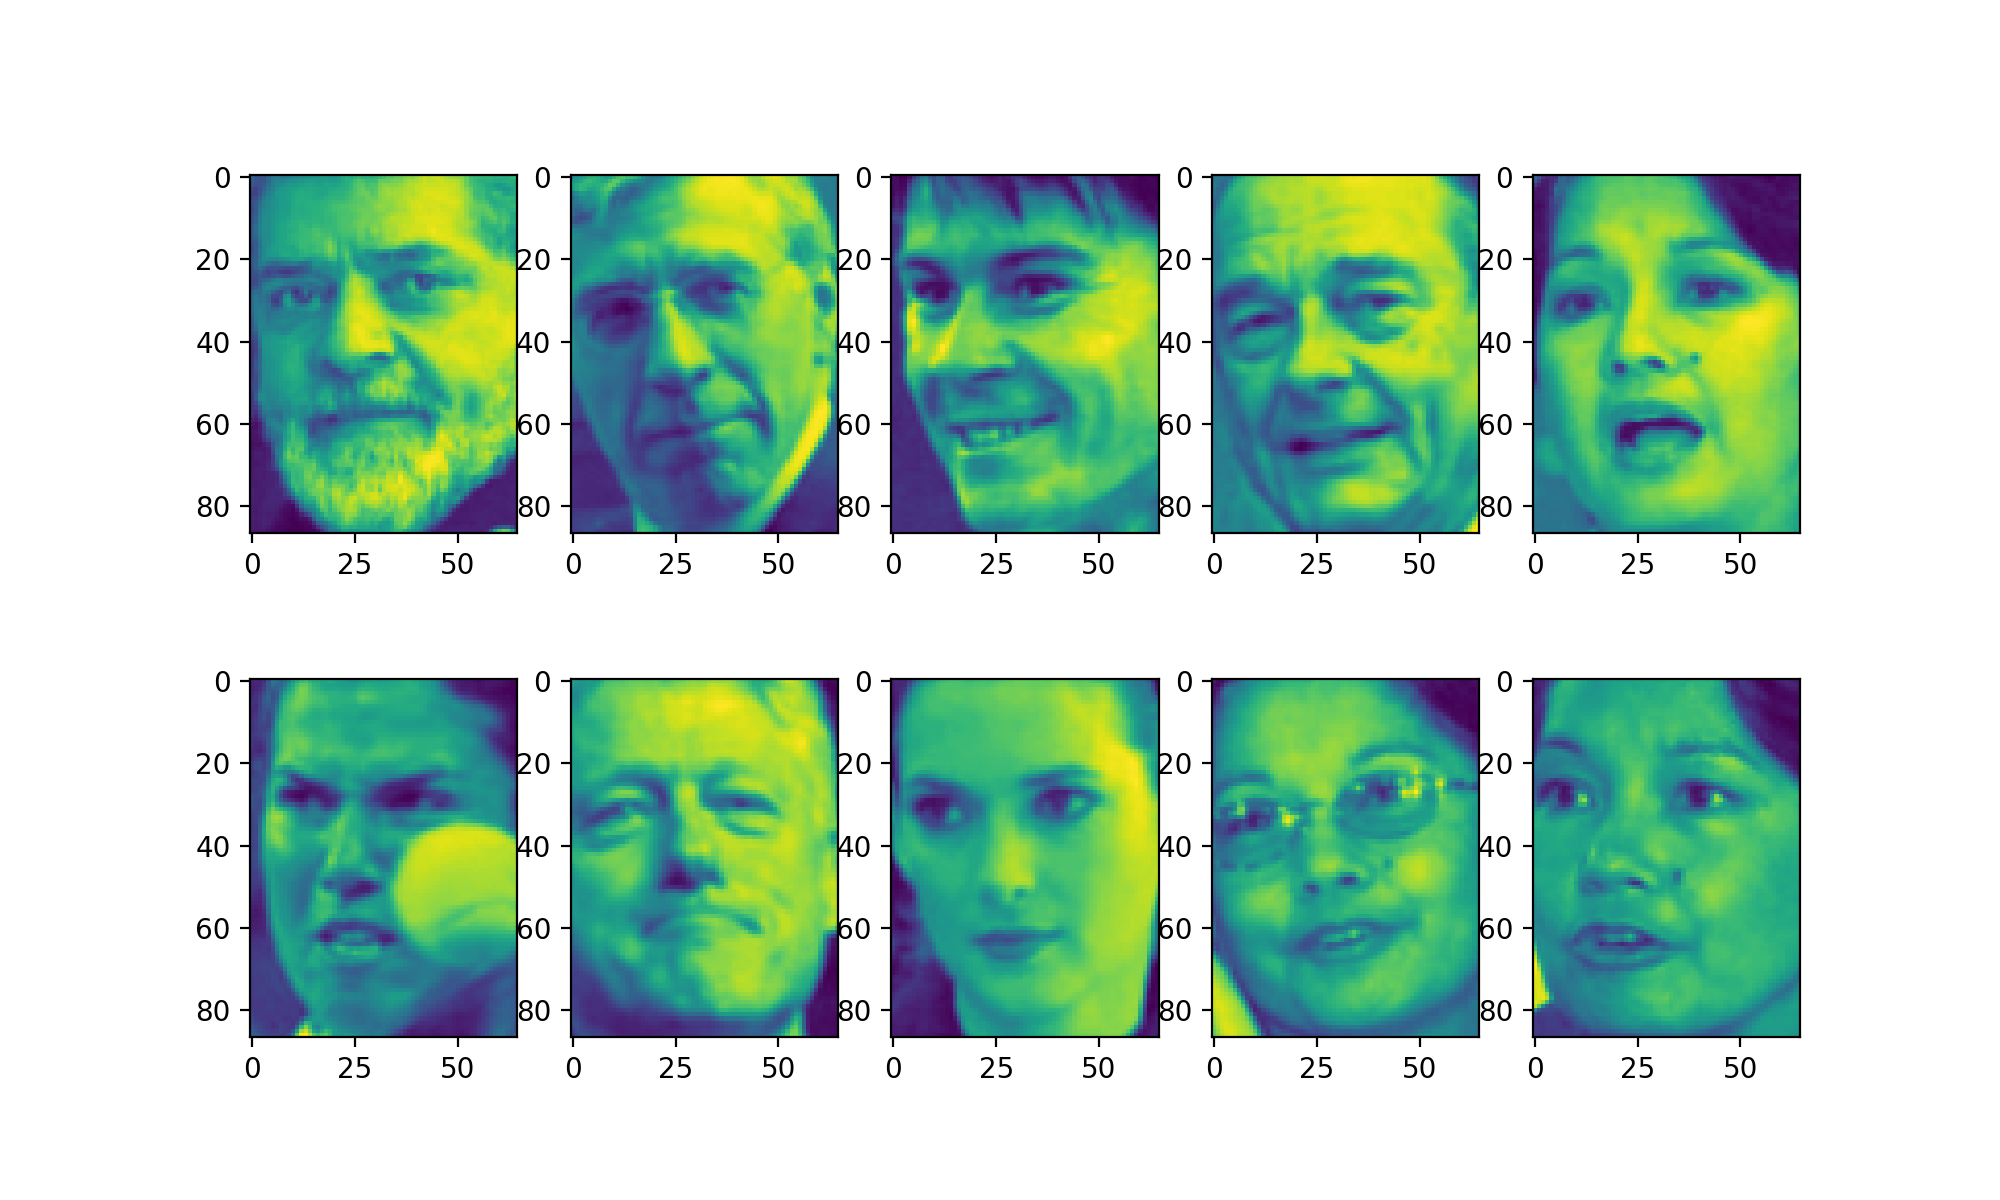

In [110]:
for compn in [3, 7]:
    inds = np.argsort(X_train_nmf[:, compn])[::-1]
    fig, axes = plt.subplots(2, 5, figsize=(10, 6))
    for i, (comp, ax) in enumerate(zip(X_train[inds], axes.ravel())):
        ax.imshow(comp.reshape(image_shape))